In [1]:
import numpy as np
import pandas as pd
import os
import warnings
warnings.filterwarnings('ignore')


### Load the training data:
* normalize XYZ with the 1st Atom
* get the distance of each 2 Atoms
* get the angle of each 3 Atoms
* get the angle of each 5 Atoms

In [2]:
PATH = 'test01.pdb' 
#PATH = 'test01A.pdb' 
#PATH = 'test01B.pdb' 
#PATH = 'test01C.pdb' 

In [3]:
data = pd.read_csv(PATH,sep='\s+')

data.columns = ['REMARK','4','1DPP','COMPLIES','X','Y','Z','2.0,','18-NOV-1998']
display(data)

REMARK    4 1DPP  COMPLIES      X      Y      Z  2.0,  18-NOV-1998
ATOM       1   C1  OLA         1  44.29  24.62  58.04   1.0          0.0
ATOM       2   C2  OLA         1  44.63  25.19  56.66   1.0          0.0
ATOM       3   C3  OLA         1  46.04  24.71  56.29   1.0          0.0
ATOM       4   C4  OLA         1  46.63  25.14  54.94   1.0          0.0
ATOM       5   C5  OLA         1  48.05  24.57  54.94   1.0          0.0
...      ...  ...  ...       ...    ...    ...    ...   ...          ...
ATOM      80  C17  OLA         4  13.33   3.74  85.90   1.0          0.0
ATOM      81  C18  OLA         4  14.17   4.44  84.83   1.0          0.0
ATOM      82  O19  OLA         4  14.77   3.94  83.89   1.0          0.0
ATOM      83  O20  OLA         4  14.23   5.79  84.99   1.0          0.0
ATOM      84  H21  OLA         4  13.65   6.10  85.75   1.0          0.0

[84 rows x 9 columns]

### Get the angle of each 3 Atoms

In [4]:
def angle_sign2(p1, p2, p3):
    p1 = list(p1)
    p2 = list(p2)
    p3 = list(p3)
    d1 = np.array(p1) - np.array(p2)
    d2 = np.array(p2) - np.array(p3)
    res = np.dot(d1, d2)
    return 1 if  res> 0 else -1

def get_angle(a, b, c):
    ba = a - b
    bc = c - b
    cosine_angle = np.dot(ba, bc) / (np.linalg.norm(ba) * np.linalg.norm(bc))
    angle = np.arccos(cosine_angle)
    #sign = angle_sign2(a, b, c)
    return(np.degrees(angle))

def dots_angle(data):
    #data = data0.copy()
    data.index = range(len(data))
    angles = [0]
    for k in range(len(data)-2):
        a = data.loc[k, ['X', 'Y', 'Z']]
        b = data.loc[k+1, ['X', 'Y', 'Z']]
        c = data.loc[k+2, ['X', 'Y', 'Z']]
        angles.append(get_angle(a, b, c))
    angles.append(0)
    return(angles)

In [5]:
data['dots-angle'] = dots_angle(data)
display(data)

REMARK    4 1DPP  COMPLIES      X      Y      Z  2.0,  18-NOV-1998  \
0        1   C1  OLA         1  44.29  24.62  58.04   1.0          0.0   
1        2   C2  OLA         1  44.63  25.19  56.66   1.0          0.0   
2        3   C3  OLA         1  46.04  24.71  56.29   1.0          0.0   
3        4   C4  OLA         1  46.63  25.14  54.94   1.0          0.0   
4        5   C5  OLA         1  48.05  24.57  54.94   1.0          0.0   
..     ...  ...  ...       ...    ...    ...    ...   ...          ...   
79      80  C17  OLA         4  13.33   3.74  85.90   1.0          0.0   
80      81  C18  OLA         4  14.17   4.44  84.83   1.0          0.0   
81      82  O19  OLA         4  14.77   3.94  83.89   1.0          0.0   
82      83  O20  OLA         4  14.23   5.79  84.99   1.0          0.0   
83      84  H21  OLA         4  13.65   6.10  85.75   1.0          0.0   

    dots-angle  
0     0.000000  
1   107.748079  
2   118.529798  
3   104.618734  
4   110.738952  
..         ...  
79  109.614374  
80  128.339073  
81   32.665938  
82  140.573392  
83    0.000000  

[84 rows x 10 columns]

### Normalize XYZ with the 1st Atom

In [6]:
data[['X','Y','Z']] = data[['X','Y','Z']] - data.loc[0, ['X','Y','Z']]
display(data)

REMARK    4 1DPP  COMPLIES      X      Y      Z  2.0,  18-NOV-1998  \
0        1   C1  OLA         1      0      0      0   1.0          0.0   
1        2   C2  OLA         1   0.34   0.57  -1.38   1.0          0.0   
2        3   C3  OLA         1   1.75   0.09  -1.75   1.0          0.0   
3        4   C4  OLA         1   2.34   0.52   -3.1   1.0          0.0   
4        5   C5  OLA         1   3.76  -0.05   -3.1   1.0          0.0   
..     ...  ...  ...       ...    ...    ...    ...   ...          ...   
79      80  C17  OLA         4 -30.96 -20.88  27.86   1.0          0.0   
80      81  C18  OLA         4 -30.12 -20.18  26.79   1.0          0.0   
81      82  O19  OLA         4 -29.52 -20.68  25.85   1.0          0.0   
82      83  O20  OLA         4 -30.06 -18.83  26.95   1.0          0.0   
83      84  H21  OLA         4 -30.64 -18.52  27.71   1.0          0.0   

    dots-angle  
0     0.000000  
1   107.748079  
2   118.529798  
3   104.618734  
4   110.738952  
..         ...  
79  109.614374  
80  128.339073  
81   32.665938  
82  140.573392  
83    0.000000  

[84 rows x 10 columns]

### Get the distance of each 2 Atoms

In [7]:
def p1p2(p1, p2):
    squared_dist = np.sum((p1-p2)**2, axis=0)
    dist = np.sqrt(squared_dist)
    return dist

def dots_distance(data0):
    data = data0.copy()
    data.index = range(len(data))
    distances = []
    for k in range(len(data)-1):
        p1 = data.loc[k, ['X', 'Y', 'Z']]
        p2 = data.loc[k+1, ['X', 'Y', 'Z']]
        #squared_dist = np.sum((p1-p2)**2, axis=0)
        #dist = np.sqrt(squared_dist)
        #distances.append(dist)
        d1 = p1p2(p1, p2)
        distances.append(d1)
    distances.append(0)
    return(distances)

In [8]:
data['dots-distance'] = dots_distance(data)
display(data)

REMARK    4 1DPP  COMPLIES      X      Y      Z  2.0,  18-NOV-1998  \
0        1   C1  OLA         1      0      0      0   1.0          0.0   
1        2   C2  OLA         1   0.34   0.57  -1.38   1.0          0.0   
2        3   C3  OLA         1   1.75   0.09  -1.75   1.0          0.0   
3        4   C4  OLA         1   2.34   0.52   -3.1   1.0          0.0   
4        5   C5  OLA         1   3.76  -0.05   -3.1   1.0          0.0   
..     ...  ...  ...       ...    ...    ...    ...   ...          ...   
79      80  C17  OLA         4 -30.96 -20.88  27.86   1.0          0.0   
80      81  C18  OLA         4 -30.12 -20.18  26.79   1.0          0.0   
81      82  O19  OLA         4 -29.52 -20.68  25.85   1.0          0.0   
82      83  O20  OLA         4 -30.06 -18.83  26.95   1.0          0.0   
83      84  H21  OLA         4 -30.64 -18.52  27.71   1.0          0.0   

    dots-angle  dots-distance  
0     0.000000       1.531307  
1   107.748079       1.534731  
2   118.529798       1.534764  
3   104.618734       1.530131  
4   110.738952       1.528692  
..         ...            ...  
79  109.614374       1.529869  
80  128.339073       1.222129  
81   32.665938       2.219031  
82  140.573392       1.005037  
83    0.000000       0.000000  

[84 rows x 11 columns]

### Get the angle of each 4 Atoms

In [9]:
# calculate the singe (+/-) of two planes A and B
# A=(p1, p2, p3); B=(p2,p3,p4)
def angle_sign(p1, p2, p3, p4):
    p1 = list(p1)
    p2 = list(p2)
    p3 = list(p3)
    p4 = list(p4)
    d1 = np.array(p1) - np.array(p2)
    d2 = np.array(p2) - np.array(p3)
    d3 = np.array(p3) - np.array(p4)
    # (d1 x d2) * d3
    res = np.dot(np.cross(d1, d2), d3)
    return 1 if  res> 0 else -1

In [10]:
p1 = np.array([0, 0, 0])
p2 = np.array([1,0,0])
p3 = np.array([2,1,0])
p4 = np.array([2.34, 0.52, 3.1])

In [11]:
angle_sign(p1, p2, p3, p4)
angle_sign2(p2, p3, p4)

-1

In [12]:
np.linalg.det(np.array([p2, p3, [0,0,1]]) )

1.0

In [13]:
np.abs(-1)

1

In [14]:
np.cross(p3-p1, p3-p2) + p3

array([2, 1, 1])

In [15]:
alpha = get_angle(p1, p2, p3)
alpha

135.0

In [16]:
np.cos((180-alpha) *np.pi/180)

0.7071067811865476

In [17]:
c_norm = np.linalg.norm(p3-p2)
b_norm = np.linalg.norm(p2-p1)

In [18]:
p4 = (p2-p1) + (p2-p1) * (c_norm/b_norm)*np.cos((180-alpha) *np.pi/180) + p1

In [19]:
p5 = (p4-p3) + (p4-p3) + p4

In [20]:
np.cos((180-45) *np.pi/180)

-0.7071067811865475

In [21]:
def dots_extend_mirror(a, b, c):
    a = np.array(list(a))
    b = np.array(list(b))
    c = np.array(list(c))
    v_ab = b - a # vector from point b to a
    v_bc = c - b # vector from point c to b
    c_norm = np.linalg.norm(v_bc) # norm of vector bc
    b_norm = np.linalg.norm(v_ab) # # norm of vector ab
    alpha = get_angle(a, b, c) # dots angle between a, b, c
    v_ad = v_ab + v_ab * (c_norm/b_norm)*np.cos((180-alpha) *np.pi/180) # vector ad extended from vector ab 
    d = v_ad + a # coordinates of middel point d, which is extended from vector ab
    v_cd = d - c # vector from point c to d
    v_ce = v_cd + v_cd # vector ce extended from vector cd
    e = v_ce + c # coordinates of mirrored point e, which is extended from vector cd
    return(e)

In [22]:
dots_extend_mirror(a=[0, 0, 0], b=[1, 0, 0], c=[2, 1, 0])

array([ 2., -1.,  0.])

In [23]:
#get_mirror_xyz(point1=[1,0,0], point2=[0,0,0], point3=[0,1,0], point4=[0.5,0.5,0])

In [206]:
import math

# Equation of a plane through three points
# https://kitchingroup.cheme.cmu.edu/blog/2015/01/18/Equation-of-a-plane-through-three-points/
def dots_plane(a, b, c):
    p1 = np.array(list(a))
    p2 = np.array(list(b))
    p3 = np.array(list(c))
    v1 = p3 - p1
    v2 = p2 - p1
    return(np.cross(v1, v2))


def dots_crossprod(a, b, c):
    p1 = np.array(list(a))
    p2 = np.array(list(b))
    p3 = np.array(list(c))
    v1 = p3 - p1
    v2 = p3 - p2
    return(np.cross(v1, v2)+p3)

def dots_plane_d(a, b, c):
    p1 = np.array(list(a))
    p2 = np.array(list(b))
    p3 = np.array(list(c))
    # These two vectors are in the plane
    v1 = p3 - p1
    v2 = p2 - p1
    # the cross product is a vector normal to the plane
    cp = np.cross(v1, v2)
    a, b, c = cp
    # This evaluates a * x3 + b * y3 + c * z3 which equals d
    d = np.dot(cp, p3)
    return (a,b,c,d)


# Function to mirror image
# https://www.geeksforgeeks.org/mirror-of-a-point-through-a-3-d-plane/
def mirror_point(a, b, c, d, x1, y1, z1):
    k = -2*(a*x1 + b*y1 + c*z1 + d)/float((a*a + b*b + c*c))
    x3 = a * k + x1
    y3 = b * k + y1
    z3 = c * k + z1
    return([x3, y3, z3])

# get mirrored point4, given a plane defined by point1, point2, point3 
def get_mirror_xyz(point1, point2, point3, point4):
    p1 = np.array(list(point1))
    p2 = np.array(list(point2))
    p3 = np.array(list(point3))
    p4 = np.array(list(point4))
    offset = p1
    p4 = p4 - offset
    a,b,c,d = dots_plane_d(p1-offset, p2-offset, p3-offset)
    pm = mirror_point(a, b, c, d, p4[0], p4[1], p4[2])
    ans = pm + offset
    return(ans)



def plane_sign(p1, p2, p3, p4):
    p1 = np.array(list(p1))
    p2 = np.array(list(p2))
    p3 = np.array(list(p3))
    p4 = np.array(list(p4))
    v1 = p2 - p1
    v2 = p3 - p2
    v3 = p4 - p3
    return np.dot(v3, np.cross(v1,v2))
    
# Find the Angle between two planes in 3D.
# https://www.geeksforgeeks.org/angle-between-two-planes-in-3d/
def planes_angle(a1, b1, c1, a2, b2, c2):
    d = ( a1 * a2 + b1 * b2 + c1 * c2 )
    e1 = math.sqrt( a1 * a1 + b1 * b1 + c1 * c1)
    e2 = math.sqrt( a2 * a2 + b2 * b2 + c2 * c2)
    d = d / (e1 * e2)
    A = math.degrees(math.acos(d))
    return(A)

def surface_angle(data):
    #data = data0.copy()
    data.index = range(len(data))
    angles = [0,0]
    for k in range(len(data)-3):
        a = data.loc[k, ['X', 'Y', 'Z']]
        b = data.loc[k+1, ['X', 'Y', 'Z']]
        c = data.loc[k+2, ['X', 'Y', 'Z']]
        d = data.loc[k+3, ['X', 'Y', 'Z']]
        #e = data.loc[k+4, ['X', 'Y', 'Z']]
        x1, y1, z1 = dots_plane(a,b,c)
        x2, y2, z2 = dots_plane(b,c,d)
        A = planes_angle(x1, y1, z1, x2, y2, z2)
        #sign = 1 if plane_sign(a, b, c, d) >= 0 else -1
        angles.append(A)
    angles.append(0)
    #angles.append(0)
    return(angles)

In [25]:
p1=[1,0,0]
p2=[0,3,0]
p3=[1,3,0]
a, b, c, d = dots_plane_d(p1, p2, p3)
print(a, b, c, d)
x1 = 1
y1 = 10
z1 = 4
 
# function call
mirror_point(a, b, c, d, x1, y1, z1) 

0 0 3 0


[1.0, 10.0, -4.0]

In [26]:
data['planes-angle'] = surface_angle(data)
display(data)

REMARK    4 1DPP  COMPLIES      X      Y      Z  2.0,  18-NOV-1998  \
0        1   C1  OLA         1      0      0      0   1.0          0.0   
1        2   C2  OLA         1   0.34   0.57  -1.38   1.0          0.0   
2        3   C3  OLA         1   1.75   0.09  -1.75   1.0          0.0   
3        4   C4  OLA         1   2.34   0.52   -3.1   1.0          0.0   
4        5   C5  OLA         1   3.76  -0.05   -3.1   1.0          0.0   
..     ...  ...  ...       ...    ...    ...    ...   ...          ...   
79      80  C17  OLA         4 -30.96 -20.88  27.86   1.0          0.0   
80      81  C18  OLA         4 -30.12 -20.18  26.79   1.0          0.0   
81      82  O19  OLA         4 -29.52 -20.68  25.85   1.0          0.0   
82      83  O20  OLA         4 -30.06 -18.83  26.95   1.0          0.0   
83      84  H21  OLA         4 -30.64 -18.52  27.71   1.0          0.0   

    dots-angle  dots-distance  planes-angle  
0     0.000000       1.531307      0.000000  
1   107.748079       1.534731      0.000000  
2   118.529798       1.534764    179.858227  
3   104.618734       1.530131    176.528730  
4   110.738952       1.528692    173.205899  
..         ...            ...           ...  
79  109.614374       1.529869    171.491245  
80  128.339073       1.222129     10.868953  
81   32.665938       2.219031    179.780789  
82  140.573392       1.005037      6.049580  
83    0.000000       0.000000      0.000000  

[84 rows x 12 columns]

In [27]:
get_mirror_xyz([2.34,0.52,-3.1],[3.684,-0.208,-3.183],[4.334,0.010,-4.547],[3.839,0.139,-5.323])

array([ 4.20553327,  0.78400961, -5.04524434])

In [28]:
data_sim = data.copy()
data_sim

REMARK    4 1DPP  COMPLIES      X      Y      Z  2.0,  18-NOV-1998  \
0        1   C1  OLA         1      0      0      0   1.0          0.0   
1        2   C2  OLA         1   0.34   0.57  -1.38   1.0          0.0   
2        3   C3  OLA         1   1.75   0.09  -1.75   1.0          0.0   
3        4   C4  OLA         1   2.34   0.52   -3.1   1.0          0.0   
4        5   C5  OLA         1   3.76  -0.05   -3.1   1.0          0.0   
..     ...  ...  ...       ...    ...    ...    ...   ...          ...   
79      80  C17  OLA         4 -30.96 -20.88  27.86   1.0          0.0   
80      81  C18  OLA         4 -30.12 -20.18  26.79   1.0          0.0   
81      82  O19  OLA         4 -29.52 -20.68  25.85   1.0          0.0   
82      83  O20  OLA         4 -30.06 -18.83  26.95   1.0          0.0   
83      84  H21  OLA         4 -30.64 -18.52  27.71   1.0          0.0   

    dots-angle  dots-distance  planes-angle  
0     0.000000       1.531307      0.000000  
1   107.748079       1.534731      0.000000  
2   118.529798       1.534764    179.858227  
3   104.618734       1.530131    176.528730  
4   110.738952       1.528692    173.205899  
..         ...            ...           ...  
79  109.614374       1.529869    171.491245  
80  128.339073       1.222129     10.868953  
81   32.665938       2.219031    179.780789  
82  140.573392       1.005037      6.049580  
83    0.000000       0.000000      0.000000  

[84 rows x 12 columns]

### Solve 3 equations, to get x,y,z of D, given A, B, C
* C, D := dot_distance
* B, C, D := dot_angle
* A, B, C, D := planes-angle

In [29]:
from scipy.optimize import fsolve
import random

def solve_d(data, k):
    a = data.loc[k, ['X', 'Y', 'Z']]
    b = data.loc[k+1, ['X', 'Y', 'Z']]
    c = data.loc[k+2, ['X', 'Y', 'Z']]
    #d = data.loc[k+3, ['X', 'Y', 'Z']]
    feature = data.loc[k+2,["dots-angle", "dots-distance", "planes-angle"]]

    def fn0(w):
        sign = 1
        #sign = angle_sign2(b, c, w)
        return sign*get_angle(b, c, w)

    def fn1(w):
        return p1p2(c, w)

    def fn2(w):
        x1, y1, z1 = dots_plane(a,b,c)
        x2, y2, z2 = dots_plane(b,c,w)
        sign = 1
        #sign = 1 if plane_sign(a, b, c, w) >= 0 else -1
        A = planes_angle(x1, y1, z1, x2, y2, z2, solve=True)
        return sign*A
    
    def myFunction(w):
       F = np.empty((3))
       F[0] = fn0(w) - feature[0]
       F[1] = fn1(w) - feature[1]
       F[2] = fn2(w) - feature[2]
       return F
    
    wGuess = np.array([0.1, 0.1, 0.1])
    w = fsolve(myFunction,wGuess)
    
    ## w2 is mirror of w from the plane of points a, b, c
    w2 = get_mirror_xyz(a,b,c,w)
    
    ## w3 is mirror of w from extended vector b c
    w3 = dots_extend_mirror(b, c, w)
    
    ## w4 is mirror of w2 from extended vector b c
    w4 = dots_extend_mirror(b, c, w2)
    
    ans = [w, w2, w3, w4]
    #return ans[np.random.choice(3)]
    return ans

In [30]:
data_sim = data.copy()
display(data_sim)

REMARK    4 1DPP  COMPLIES      X      Y      Z  2.0,  18-NOV-1998  \
0        1   C1  OLA         1      0      0      0   1.0          0.0   
1        2   C2  OLA         1   0.34   0.57  -1.38   1.0          0.0   
2        3   C3  OLA         1   1.75   0.09  -1.75   1.0          0.0   
3        4   C4  OLA         1   2.34   0.52   -3.1   1.0          0.0   
4        5   C5  OLA         1   3.76  -0.05   -3.1   1.0          0.0   
..     ...  ...  ...       ...    ...    ...    ...   ...          ...   
79      80  C17  OLA         4 -30.96 -20.88  27.86   1.0          0.0   
80      81  C18  OLA         4 -30.12 -20.18  26.79   1.0          0.0   
81      82  O19  OLA         4 -29.52 -20.68  25.85   1.0          0.0   
82      83  O20  OLA         4 -30.06 -18.83  26.95   1.0          0.0   
83      84  H21  OLA         4 -30.64 -18.52  27.71   1.0          0.0   

    dots-angle  dots-distance  planes-angle  
0     0.000000       1.531307      0.000000  
1   107.748079       1.534731      0.000000  
2   118.529798       1.534764    179.858227  
3   104.618734       1.530131    176.528730  
4   110.738952       1.528692    173.205899  
..         ...            ...           ...  
79  109.614374       1.529869    171.491245  
80  128.339073       1.222129     10.868953  
81   32.665938       2.219031    179.780789  
82  140.573392       1.005037      6.049580  
83    0.000000       0.000000      0.000000  

[84 rows x 12 columns]

In [31]:
k=0
solve_d(data_sim, k)

[array([ 2.34260354,  0.52542591, -3.09711741]),
 array([ 2.34,  0.52, -3.1 ]),
 array([ 2.50430144, -0.80394675, -0.75632574]),
 array([ 2.50690498, -0.79852085, -0.75344315])]

In [32]:
ans = solve_d(data_sim, k)
ans
p1p2(data_sim[['X','Y','Z']].iloc[k], data_sim[['X','Y','Z']].iloc[k+3])

3.9186732448623505

In [33]:
list(range(3,5))

[3, 4]

In [34]:
np.argmax(np.array([3,5,1]))

1

In [35]:
np.random.choice([[1],[1,2]])

[1]

In [36]:
def run_sim_df(data_sim, d=0, m=0):
    for k in range(m, len(data_sim)-3):
        xyz_sim = solve_d(data_sim, k)
        #print('SIM: ', xyz_sim)
        #print('OBS: ', list(data_sim.loc[k+3, ['X', 'Y', 'Z']]))
        ## replace observed XYX with simulated XYZ
        p1 = data_sim[['X','Y','Z']].iloc[k]
        l = np.array([p1p2(p1,xyz_sim[0]), p1p2(p1,xyz_sim[1]), p1p2(p1,xyz_sim[2]), p1p2(p1,xyz_sim[3])])
        d_max = np.argmax(l)
        d_random = np.random.choice([0,1,2,3])
        d = np.random.choice([d_max, d_random], p=[0.95, 0.05])
        data_sim.at[k+3, 'X'] = xyz_sim[d][0]
        data_sim.at[k+3, 'Y'] = xyz_sim[d][1]
        data_sim.at[k+3, 'Z'] = xyz_sim[d][2]

    #list(data_sim.columns)

    sim = data_sim.copy()
    obs = data.copy()

    #sim.index = ['ATOM' for k in range(len(sim))]
    #obs.index = ['ATOM' for k in range(len(obs))]
    sim.index = [k for k in range(len(sim))]
    obs.index = [k for k in range(len(obs))]

    sim['X'] = sim['X'].astype(np.double)
    sim['Y'] = sim['Y'].astype(np.double)
    sim['Z'] = sim['Z'].astype(np.double)

    obs['X'] = obs['X'].astype(np.double)
    obs['Y'] = obs['Y'].astype(np.double)
    obs['Z'] = obs['Z'].astype(np.double)

    sim = sim.round(3)
    obs = obs.round(3)
    #print(sim)
    #print(obs)

    #sim[['REMARK','4','1DPP', 'COMPLIES', 'X','Y','Z', '2.0,', '18-NOV-1998']].to_csv('data_sim.pdb', sep =',')
    #obs[['REMARK','4','1DPP', 'COMPLIES', 'X','Y','Z', '2.0,', '18-NOV-1998']].round(3).to_csv('data_obs.pdb', sep =',')

    tmpdf = pd.concat([obs[['REMARK','4','1DPP', 'COMPLIES', 'X','Y','Z', '2.0,', '18-NOV-1998']], 
               sim[['dots-angle', 'dots-distance','planes-angle', 'X','Y','Z']]], axis=1)
    tmpdf.columns =['REMARK','4','1DPP','COMPLIES','X','Y','Z','2.0,','18-NOV-1998','dots-angle','dots-distance','planes-angle',
                    'Xsim','Ysim','Zsim']
    return(tmpdf)

In [37]:
data_sim1 = data.copy()
data_sim2 = data.copy()
data_sim3 = data.copy()
data_sim4 = data.copy()

data_sim1 = run_sim_df(data_sim1, d=0, m=0)
data_sim2 = run_sim_df(data_sim2, d=1, m=0)
data_sim3 = run_sim_df(data_sim3, d=2, m=0)
data_sim4 = run_sim_df(data_sim4, d=3, m=0)

In [38]:
#data_sim1.columns =['REMARK','4','1DPP','COMPLIES','X','Y','Z','2.0,','18-NOV-1998','dots-angle','dots-distance','planes-angle','Xsim','Ysim','Zsim']
#data_sim2.columns =['REMARK','4','1DPP','COMPLIES','X','Y','Z','2.0,','18-NOV-1998','dots-angle','dots-distance','planes-angle','Xsim','Ysim','Zsim']
#data_sim3.columns =['REMARK','4','1DPP','COMPLIES','X','Y','Z','2.0,','18-NOV-1998','dots-angle','dots-distance','planes-angle','Xsim','Ysim','Zsim']
#data_sim4.columns =['REMARK','4','1DPP','COMPLIES','X','Y','Z','2.0,','18-NOV-1998','dots-angle','dots-distance','planes-angle','Xsim','Ysim','Zsim']

data_sim1.index = ['ATOM' for k in range(len(data_sim1))]
data_sim2.index = ['ATOM' for k in range(len(data_sim2))]
data_sim3.index = ['ATOM' for k in range(len(data_sim3))]
data_sim4.index = ['ATOM' for k in range(len(data_sim4))]

display(data_sim1)
display(data_sim2)
display(data_sim3)
display(data_sim4)

REMARK    4 1DPP  COMPLIES      X      Y      Z  2.0,  18-NOV-1998  \
ATOM       1   C1  OLA         1   0.00   0.00   0.00   1.0          0.0   
ATOM       2   C2  OLA         1   0.34   0.57  -1.38   1.0          0.0   
ATOM       3   C3  OLA         1   1.75   0.09  -1.75   1.0          0.0   
ATOM       4   C4  OLA         1   2.34   0.52  -3.10   1.0          0.0   
ATOM       5   C5  OLA         1   3.76  -0.05  -3.10   1.0          0.0   
...      ...  ...  ...       ...    ...    ...    ...   ...          ...   
ATOM      80  C17  OLA         4 -30.96 -20.88  27.86   1.0          0.0   
ATOM      81  C18  OLA         4 -30.12 -20.18  26.79   1.0          0.0   
ATOM      82  O19  OLA         4 -29.52 -20.68  25.85   1.0          0.0   
ATOM      83  O20  OLA         4 -30.06 -18.83  26.95   1.0          0.0   
ATOM      84  H21  OLA         4 -30.64 -18.52  27.71   1.0          0.0   

      dots-angle  dots-distance  planes-angle    Xsim    Ysim   Zsim  
ATOM       0.000          1.531         0.000   0.000   0.000  0.000  
ATOM     107.748          1.535         0.000   0.340   0.570 -1.380  
ATOM     118.530          1.535       179.858   1.750   0.090 -1.750  
ATOM     104.619          1.530       176.529   2.507  -0.799 -0.753  
ATOM     110.739          1.529       173.206   3.812  -1.156 -1.468  
...          ...            ...           ...     ...     ...    ...  
ATOM     109.614          1.530       171.491  58.728 -61.303  3.452  
ATOM     128.339          1.222        10.869  57.438 -60.510  3.669  
ATOM      32.666          2.219       179.781  57.302 -59.407  4.177  
ATOM     140.573          1.005         6.050  56.327 -61.154  3.218  
ATOM       0.000          0.000         0.000  55.413 -61.513  3.005  

[84 rows x 15 columns]

REMARK    4 1DPP  COMPLIES      X      Y      Z  2.0,  18-NOV-1998  \
ATOM       1   C1  OLA         1   0.00   0.00   0.00   1.0          0.0   
ATOM       2   C2  OLA         1   0.34   0.57  -1.38   1.0          0.0   
ATOM       3   C3  OLA         1   1.75   0.09  -1.75   1.0          0.0   
ATOM       4   C4  OLA         1   2.34   0.52  -3.10   1.0          0.0   
ATOM       5   C5  OLA         1   3.76  -0.05  -3.10   1.0          0.0   
...      ...  ...  ...       ...    ...    ...    ...   ...          ...   
ATOM      80  C17  OLA         4 -30.96 -20.88  27.86   1.0          0.0   
ATOM      81  C18  OLA         4 -30.12 -20.18  26.79   1.0          0.0   
ATOM      82  O19  OLA         4 -29.52 -20.68  25.85   1.0          0.0   
ATOM      83  O20  OLA         4 -30.06 -18.83  26.95   1.0          0.0   
ATOM      84  H21  OLA         4 -30.64 -18.52  27.71   1.0          0.0   

      dots-angle  dots-distance  planes-angle    Xsim     Ysim    Zsim  
ATOM       0.000          1.531         0.000   0.000    0.000   0.000  
ATOM     107.748          1.535         0.000   0.340    0.570  -1.380  
ATOM     118.530          1.535       179.858   1.750    0.090  -1.750  
ATOM     104.619          1.530       176.529   2.343    0.525  -3.097  
ATOM     110.739          1.529       173.206   3.692   -0.192  -3.175  
...          ...            ...           ...     ...      ...     ...  
ATOM     109.614          1.530       171.491  85.847  102.617 -44.152  
ATOM     128.339          1.222        10.869  85.552  103.069 -42.720  
ATOM      32.666          2.219       179.781  84.686  102.662 -41.960  
ATOM     140.573          1.005         6.050  86.388  104.049 -42.281  
ATOM       0.000          0.000         0.000  86.867  104.807 -41.828  

[84 rows x 15 columns]

REMARK    4 1DPP  COMPLIES      X      Y      Z  2.0,  18-NOV-1998  \
ATOM       1   C1  OLA         1   0.00   0.00   0.00   1.0          0.0   
ATOM       2   C2  OLA         1   0.34   0.57  -1.38   1.0          0.0   
ATOM       3   C3  OLA         1   1.75   0.09  -1.75   1.0          0.0   
ATOM       4   C4  OLA         1   2.34   0.52  -3.10   1.0          0.0   
ATOM       5   C5  OLA         1   3.76  -0.05  -3.10   1.0          0.0   
...      ...  ...  ...       ...    ...    ...    ...   ...          ...   
ATOM      80  C17  OLA         4 -30.96 -20.88  27.86   1.0          0.0   
ATOM      81  C18  OLA         4 -30.12 -20.18  26.79   1.0          0.0   
ATOM      82  O19  OLA         4 -29.52 -20.68  25.85   1.0          0.0   
ATOM      83  O20  OLA         4 -30.06 -18.83  26.95   1.0          0.0   
ATOM      84  H21  OLA         4 -30.64 -18.52  27.71   1.0          0.0   

      dots-angle  dots-distance  planes-angle    Xsim     Ysim    Zsim  
ATOM       0.000          1.531         0.000   0.000    0.000   0.000  
ATOM     107.748          1.535         0.000   0.340    0.570  -1.380  
ATOM     118.530          1.535       179.858   1.750    0.090  -1.750  
ATOM     104.619          1.530       176.529   2.343    0.525  -3.097  
ATOM     110.739          1.529       173.206   3.692   -0.192  -3.175  
...          ...            ...           ...     ...      ...     ...  
ATOM     109.614          1.530       171.491 -20.011  114.162 -87.050  
ATOM     128.339          1.222        10.869 -19.666  115.061 -85.862  
ATOM      32.666          2.219       179.781 -19.112  114.756 -84.816  
ATOM     140.573          1.005         6.050 -20.046  116.356 -86.037  
ATOM       0.000          0.000         0.000 -20.316  117.322 -85.976  

[84 rows x 15 columns]

REMARK    4 1DPP  COMPLIES      X      Y      Z  2.0,  18-NOV-1998  \
ATOM       1   C1  OLA         1   0.00   0.00   0.00   1.0          0.0   
ATOM       2   C2  OLA         1   0.34   0.57  -1.38   1.0          0.0   
ATOM       3   C3  OLA         1   1.75   0.09  -1.75   1.0          0.0   
ATOM       4   C4  OLA         1   2.34   0.52  -3.10   1.0          0.0   
ATOM       5   C5  OLA         1   3.76  -0.05  -3.10   1.0          0.0   
...      ...  ...  ...       ...    ...    ...    ...   ...          ...   
ATOM      80  C17  OLA         4 -30.96 -20.88  27.86   1.0          0.0   
ATOM      81  C18  OLA         4 -30.12 -20.18  26.79   1.0          0.0   
ATOM      82  O19  OLA         4 -29.52 -20.68  25.85   1.0          0.0   
ATOM      83  O20  OLA         4 -30.06 -18.83  26.95   1.0          0.0   
ATOM      84  H21  OLA         4 -30.64 -18.52  27.71   1.0          0.0   

      dots-angle  dots-distance  planes-angle    Xsim    Ysim    Zsim  
ATOM       0.000          1.531         0.000   0.000   0.000   0.000  
ATOM     107.748          1.535         0.000   0.340   0.570  -1.380  
ATOM     118.530          1.535       179.858   1.750   0.090  -1.750  
ATOM     104.619          1.530       176.529   2.343   0.525  -3.097  
ATOM     110.739          1.529       173.206   3.692  -0.192  -3.175  
...          ...            ...           ...     ...     ...     ...  
ATOM     109.614          1.530       171.491  29.445  66.330 -15.912  
ATOM     128.339          1.222        10.869  30.114  64.963 -15.755  
ATOM      32.666          2.219       179.781  30.354  64.133 -16.619  
ATOM     140.573          1.005         6.050  30.474  64.684 -14.473  
ATOM       0.000          0.000         0.000  30.860  64.351 -13.607  

[84 rows x 15 columns]

In [39]:
data_sim1[['REMARK','4','1DPP', 'COMPLIES', 'Xsim','Ysim','Zsim', '2.0,', '18-NOV-1998']].to_csv('data_sim1.csv', sep =',')
data_sim2[['REMARK','4','1DPP', 'COMPLIES', 'Xsim','Ysim','Zsim', '2.0,', '18-NOV-1998']].to_csv('data_sim2.csv', sep =',')
data_sim3[['REMARK','4','1DPP', 'COMPLIES', 'Xsim','Ysim','Zsim', '2.0,', '18-NOV-1998']].to_csv('data_sim3.csv', sep =',')
data_sim4[['REMARK','4','1DPP', 'COMPLIES', 'Xsim','Ysim','Zsim', '2.0,', '18-NOV-1998']].to_csv('data_sim4.csv', sep =',')

data_sim4[['REMARK','4','1DPP', 'COMPLIES', 'X','Y','Z', '2.0,', '18-NOV-1998']].to_csv('data_obs1.csv', sep =',')

os.system('sh csv2pdb2.sh')

0

In [40]:
np.linalg.norm(data_sim4[['Xsim','Ysim','Zsim']].iloc[2] - data_sim4[['Xsim','Ysim','Zsim']].iloc[3])

1.5346931289349022

In [41]:
get_angle(data_sim4[['Xsim','Ysim','Zsim']].iloc[1], 
          data_sim4[['Xsim','Ysim','Zsim']].iloc[2], 
          data_sim4[['Xsim','Ysim','Zsim']].iloc[3])

118.55117025461429

In [42]:
get_angle(a, b, c)

nan

In [43]:
data

REMARK    4 1DPP  COMPLIES      X      Y      Z  2.0,  18-NOV-1998  \
0        1   C1  OLA         1      0      0      0   1.0          0.0   
1        2   C2  OLA         1   0.34   0.57  -1.38   1.0          0.0   
2        3   C3  OLA         1   1.75   0.09  -1.75   1.0          0.0   
3        4   C4  OLA         1   2.34   0.52   -3.1   1.0          0.0   
4        5   C5  OLA         1   3.76  -0.05   -3.1   1.0          0.0   
..     ...  ...  ...       ...    ...    ...    ...   ...          ...   
79      80  C17  OLA         4 -30.96 -20.88  27.86   1.0          0.0   
80      81  C18  OLA         4 -30.12 -20.18  26.79   1.0          0.0   
81      82  O19  OLA         4 -29.52 -20.68  25.85   1.0          0.0   
82      83  O20  OLA         4 -30.06 -18.83  26.95   1.0          0.0   
83      84  H21  OLA         4 -30.64 -18.52  27.71   1.0          0.0   

    dots-angle  dots-distance  planes-angle  
0     0.000000       1.531307      0.000000  
1   107.748079       1.534731      0.000000  
2   118.529798       1.534764    179.858227  
3   104.618734       1.530131    176.528730  
4   110.738952       1.528692    173.205899  
..         ...            ...           ...  
79  109.614374       1.529869    171.491245  
80  128.339073       1.222129     10.868953  
81   32.665938       2.219031    179.780789  
82  140.573392       1.005037      6.049580  
83    0.000000       0.000000      0.000000  

[84 rows x 12 columns]

### Load all protein data

In [247]:
#PATH = 'CeramideMix-lipids-Test.pdb'
#PATH = 'test01.pdb'
#PATH = 'test06.pdb'
PATH = 'CeramideMix.pdb'

In [248]:
data_all = pd.read_csv(PATH,sep='\s+')

data_all.columns = ['REMARK','Cx','1DPP','COMPLIES','X','Y','Z','2.0,','18-NOV-1998']
data_all = data_all[data_all['1DPP'] == 'OLA']
# data_all = data_all[data_all['Cx'] != 'O20'] # drop O20
data_all = data_all[data_all['Cx'] != 'O19'] # drop O19
data_all.index = range(len(data_all))
display(data_all)

REMARK   Cx 1DPP  COMPLIES       X      Y      Z  2.0,  18-NOV-1998
0         1.0   C1  OLA       1.0   44.29  24.62  58.04   1.0          0.0
1         2.0   C2  OLA       1.0   44.63  25.19  56.66   1.0          0.0
2         3.0   C3  OLA       1.0   46.04  24.71  56.29   1.0          0.0
3         4.0   C4  OLA       1.0   46.63  25.14  54.94   1.0          0.0
4         5.0   C5  OLA       1.0   48.05  24.57  54.94   1.0          0.0
...       ...  ...  ...       ...     ...    ...    ...   ...          ...
1275  63535.0  C16  OLA    6240.0  106.55  53.02  78.65   1.0          0.0
1276  63536.0  C17  OLA    6240.0  106.95  52.32  79.95   1.0          0.0
1277  63537.0  C18  OLA    6240.0  106.48  52.96  81.26   1.0          0.0
1278  63539.0  O20  OLA    6240.0  106.44  52.12  82.33   1.0          0.0
1279  63540.0  H21  OLA    6240.0  106.28  52.74  83.10   1.0          0.0

[1280 rows x 9 columns]

In [249]:
df=data_all
k=3

pn3=np.array(df.loc[k-3, ['X', 'Y', 'Z']])
pn2=np.array(df.loc[k-2, ['X', 'Y', 'Z']])
pn1=np.array(df.loc[k-1, ['X', 'Y', 'Z']])
p1=np.array(df.loc[k, ['X', 'Y', 'Z']])
p2=np.array(df.loc[k+1, ['X', 'Y', 'Z']])
p3=np.array(df.loc[k+2, ['X', 'Y', 'Z']])
p4=np.array(df.loc[k+3, ['X', 'Y', 'Z']])

print("c{0} <-> c{1}: ".format(k+1,k+1+3), np.linalg.norm(p4-p1))
print("c{0} <-> c{1}: ".format(k+1,k+1+2), np.linalg.norm(p3-p1))
print("c{0} <-> c{1}: ".format(k+1,k+1+1), np.linalg.norm(p2-p1))
print("c{0} <-> c{1}: ".format(k+1-1,k+1), np.linalg.norm(p1-pn1))
print("c{0} <-> c{1}: ".format(k+1-2,k+1), np.linalg.norm(p1-pn2))
print("c{0} <-> c{1}: ".format(k+1-3,k+1), np.linalg.norm(p1-pn3))

c4 <-> c7:  2.969276006032442
c4 <-> c6:  2.5169028586737268
c4 <-> c5:  1.5301307133705881
c3 <-> c4:  1.5347638254793496
c2 <-> c4:  2.638351758200562
c1 <-> c4:  3.9186732448623505


In [250]:
COMPLIES = np.unique(data_all['COMPLIES'])[:-1]
#protein_list = [data_all[data_all['COMPLIES'] == COMPLIES[k]].copy() for k in range(len(COMPLIES))]
#protein_list = [data_all[data_all['COMPLIES'] == COMPLIES[k]] for k in range(len(COMPLIES))]
protein_list = []
for k in range(len(COMPLIES)):
    #tmp_df = data_all[data_all['COMPLIES'] == COMPLIES[k]].copy()
    tmp_df = data_all[data_all['COMPLIES'] == COMPLIES[k]]
    tmp_df.index = range(len(tmp_df))
    protein_list.append(tmp_df)

In [251]:
COMPLIES

array([1.000e+00, 2.000e+00, 3.000e+00, 4.000e+00, 5.000e+00, 6.000e+00,
       7.000e+00, 8.000e+00, 9.000e+00, 1.000e+01, 1.100e+01, 1.200e+01,
       1.300e+01, 1.400e+01, 1.500e+01, 1.600e+01, 8.170e+02, 8.180e+02,
       8.190e+02, 8.200e+02, 8.210e+02, 8.220e+02, 8.230e+02, 8.240e+02,
       8.250e+02, 8.260e+02, 8.270e+02, 8.280e+02, 8.290e+02, 8.300e+02,
       8.310e+02, 8.320e+02, 5.409e+03, 5.410e+03, 5.411e+03, 5.412e+03,
       5.413e+03, 5.414e+03, 5.415e+03, 5.416e+03, 5.417e+03, 5.418e+03,
       5.419e+03, 5.420e+03, 5.421e+03, 5.422e+03, 5.423e+03, 5.424e+03,
       6.225e+03, 6.226e+03, 6.227e+03, 6.228e+03, 6.229e+03, 6.230e+03,
       6.231e+03, 6.232e+03, 6.233e+03, 6.234e+03, 6.235e+03, 6.236e+03,
       6.237e+03, 6.238e+03, 6.239e+03])

In [252]:
display(protein_list[0])

REMARK   Cx 1DPP  COMPLIES      X      Y      Z  2.0,  18-NOV-1998
0      1.0   C1  OLA       1.0  44.29  24.62  58.04   1.0          0.0
1      2.0   C2  OLA       1.0  44.63  25.19  56.66   1.0          0.0
2      3.0   C3  OLA       1.0  46.04  24.71  56.29   1.0          0.0
3      4.0   C4  OLA       1.0  46.63  25.14  54.94   1.0          0.0
4      5.0   C5  OLA       1.0  48.05  24.57  54.94   1.0          0.0
5      6.0   C6  OLA       1.0  48.83  25.06  53.72   1.0          0.0
6      7.0   C7  OLA       1.0  48.14  24.56  52.45   1.0          0.0
7      8.0   C8  OLA       1.0  48.63  24.69  51.00   1.0          0.0
8      9.0   C9  OLA       1.0  47.74  24.05  49.94   1.0          0.0
9     10.0  C10  OLA       1.0  47.84  24.38  48.59   1.0          0.0
10    11.0  C11  OLA       1.0  48.72  25.47  47.99   1.0          0.0
11    12.0  C12  OLA       1.0  48.41  25.61  46.50   1.0          0.0
12    13.0  C13  OLA       1.0  48.72  24.41  45.60   1.0          0.0
13    14.0  C14  OLA       1.0  48.48  24.71  44.12   1.0          0.0
14    15.0  C15  OLA       1.0  48.57  23.44  43.28   1.0          0.0
15    16.0  C16  OLA       1.0  48.50  23.68  41.77   1.0          0.0
16    17.0  C17  OLA       1.0  48.90  22.41  41.02   1.0          0.0
17    18.0  C18  OLA       1.0  48.76  22.47  39.50   1.0          0.0
18    20.0  O20  OLA       1.0  49.74  21.80  38.83   1.0          0.0
19    21.0  H21  OLA       1.0  49.49  22.15  37.93   1.0          0.0

In [253]:
df = protein_list[0]
k=3

pn3=np.array(df.loc[k-3, ['X', 'Y', 'Z']])
pn2=np.array(df.loc[k-2, ['X', 'Y', 'Z']])
pn1=np.array(df.loc[k-1, ['X', 'Y', 'Z']])
p1=np.array(df.loc[k, ['X', 'Y', 'Z']])
p2=np.array(df.loc[k+1, ['X', 'Y', 'Z']])
p3=np.array(df.loc[k+2, ['X', 'Y', 'Z']])
p4=np.array(df.loc[k+3, ['X', 'Y', 'Z']])

print("c{0} <-> c{1}: ".format(k+1,k+1+3), np.linalg.norm(p4-p1))
print("c{0} <-> c{1}: ".format(k+1,k+1+2), np.linalg.norm(p3-p1))
print("c{0} <-> c{1}: ".format(k+1,k+1+1), np.linalg.norm(p2-p1))
print("c{0} <-> c{1}: ".format(k+1-1,k+1), np.linalg.norm(p1-pn1))
print("c{0} <-> c{1}: ".format(k+1-2,k+1), np.linalg.norm(p1-pn2))
print("c{0} <-> c{1}: ".format(k+1-3,k+1), np.linalg.norm(p1-pn3))

c4 <-> c7:  2.969276006032442
c4 <-> c6:  2.5169028586737268
c4 <-> c5:  1.5301307133705881
c3 <-> c4:  1.5347638254793496
c2 <-> c4:  2.638351758200562
c1 <-> c4:  3.9186732448623505


In [254]:
def sim_XYZ(data):
    data_sim = data.copy()
    for k in range(len(data_sim)-3):
        xyz_sim = solve_d(data_sim, k)
        #print('SIM: ', xyz_sim)
        #print('OBS: ', list(data_sim.loc[k+3, ['X', 'Y', 'Z']]))
        ## replace observed XYX with simulated XYZ
        data_sim.at[k+3, 'X'] = xyz_sim[0]
        data_sim.at[k+3, 'Y'] = xyz_sim[1]
        data_sim.at[k+3, 'Z'] = xyz_sim[2]
    return(data_sim)

In [255]:
def portein_format(data):
    data.index = range(len(data))
    #data[['X','Y','Z']] = data[['X','Y','Z']] - data.loc[0, ['X','Y','Z']]
    data['dots-angle'] = dots_angle(data)
    data['dots-distance'] = dots_distance(data)
    data['planes-angle'] = surface_angle(data)
    ## simulate XYZ given dot-angle, dots-distance, planes-angle
    #data_sim = sim_XYZ(data)
    data_sim = run_sim_df(data)
    data['Xsim'] = data_sim['Xsim']
    data['Ysim'] = data_sim['Ysim']
    data['Zsim'] = data_sim['Zsim']
    return(data)

In [256]:
#portein_format_list = [portein_format(p) for p in protein_list]
portein_format_list = [p for p in protein_list]

In [257]:
#portein_format(protein_list[1])

In [258]:
portein_format_list[0]

REMARK   Cx 1DPP  COMPLIES      X      Y      Z  2.0,  18-NOV-1998
0      1.0   C1  OLA       1.0  44.29  24.62  58.04   1.0          0.0
1      2.0   C2  OLA       1.0  44.63  25.19  56.66   1.0          0.0
2      3.0   C3  OLA       1.0  46.04  24.71  56.29   1.0          0.0
3      4.0   C4  OLA       1.0  46.63  25.14  54.94   1.0          0.0
4      5.0   C5  OLA       1.0  48.05  24.57  54.94   1.0          0.0
5      6.0   C6  OLA       1.0  48.83  25.06  53.72   1.0          0.0
6      7.0   C7  OLA       1.0  48.14  24.56  52.45   1.0          0.0
7      8.0   C8  OLA       1.0  48.63  24.69  51.00   1.0          0.0
8      9.0   C9  OLA       1.0  47.74  24.05  49.94   1.0          0.0
9     10.0  C10  OLA       1.0  47.84  24.38  48.59   1.0          0.0
10    11.0  C11  OLA       1.0  48.72  25.47  47.99   1.0          0.0
11    12.0  C12  OLA       1.0  48.41  25.61  46.50   1.0          0.0
12    13.0  C13  OLA       1.0  48.72  24.41  45.60   1.0          0.0
13    14.0  C14  OLA       1.0  48.48  24.71  44.12   1.0          0.0
14    15.0  C15  OLA       1.0  48.57  23.44  43.28   1.0          0.0
15    16.0  C16  OLA       1.0  48.50  23.68  41.77   1.0          0.0
16    17.0  C17  OLA       1.0  48.90  22.41  41.02   1.0          0.0
17    18.0  C18  OLA       1.0  48.76  22.47  39.50   1.0          0.0
18    20.0  O20  OLA       1.0  49.74  21.80  38.83   1.0          0.0
19    21.0  H21  OLA       1.0  49.49  22.15  37.93   1.0          0.0

In [259]:
df = portein_format_list[0]
k=3

pn3=np.array(df.loc[k-3, ['X', 'Y', 'Z']])
pn2=np.array(df.loc[k-2, ['X', 'Y', 'Z']])
pn1=np.array(df.loc[k-1, ['X', 'Y', 'Z']])
p1=np.array(df.loc[k, ['X', 'Y', 'Z']])
p2=np.array(df.loc[k+1, ['X', 'Y', 'Z']])
p3=np.array(df.loc[k+2, ['X', 'Y', 'Z']])
p4=np.array(df.loc[k+3, ['X', 'Y', 'Z']])

print("c{0} <-> c{1}: ".format(k+1,k+1+3), np.linalg.norm(p4-p1))
print("c{0} <-> c{1}: ".format(k+1,k+1+2), np.linalg.norm(p3-p1))
print("c{0} <-> c{1}: ".format(k+1,k+1+1), np.linalg.norm(p2-p1))
print("c{0} <-> c{1}: ".format(k+1-1,k+1), np.linalg.norm(p1-pn1))
print("c{0} <-> c{1}: ".format(k+1-2,k+1), np.linalg.norm(p1-pn2))
print("c{0} <-> c{1}: ".format(k+1-3,k+1), np.linalg.norm(p1-pn3))

c4 <-> c7:  2.969276006032442
c4 <-> c6:  2.5169028586737268
c4 <-> c5:  1.5301307133705881
c3 <-> c4:  1.5347638254793496
c2 <-> c4:  2.638351758200562
c1 <-> c4:  3.9186732448623505


In [260]:
k=5
df.loc[k, ['X', 'Y', 'Z']] - data_all.loc[k, ['X', 'Y', 'Z']]

X    0
Y    0
Z    0
Name: 5, dtype: object

In [261]:
def remove_digits(s):
    return(''.join([i for i in s if not i.isdigit()]))

def atom_seq(data):
    atoms = [None,None]
    for k in range(2, len(data)-1):
        tmp = remove_digits(''.join(data['Cx'][(k-2):(k+2)]))
        atoms.append(tmp)
    atoms.append(None)
    #atoms.append(None)
    data['atom_seq'] = atoms
    return(data)

In [262]:
portein_format_list = [atom_seq(data) for data in portein_format_list]

In [263]:
df = pd.concat(portein_format_list)
df.to_csv("output/training_data.csv")

display(df)

REMARK   Cx 1DPP  COMPLIES      X      Y      Z  2.0,  18-NOV-1998  \
0       1.0   C1  OLA       1.0  44.29  24.62  58.04   1.0          0.0   
1       2.0   C2  OLA       1.0  44.63  25.19  56.66   1.0          0.0   
2       3.0   C3  OLA       1.0  46.04  24.71  56.29   1.0          0.0   
3       4.0   C4  OLA       1.0  46.63  25.14  54.94   1.0          0.0   
4       5.0   C5  OLA       1.0  48.05  24.57  54.94   1.0          0.0   
..      ...  ...  ...       ...    ...    ...    ...   ...          ...   
15  63514.0  C16  OLA    6239.0  87.14  29.47  37.18   1.0          0.0   
16  63515.0  C17  OLA    6239.0  86.38  28.52  36.26   1.0          0.0   
17  63516.0  C18  OLA    6239.0  87.39  27.77  35.39   1.0          0.0   
18  63518.0  O20  OLA    6239.0  87.78  28.48  34.30   1.0          0.0   
19  63519.0  H21  OLA    6239.0  87.14  29.23  34.16   1.0          0.0   

   atom_seq  
0      None  
1      None  
2      CCCC  
3      CCCC  
4      CCCC  
..      ...  
15     CCCC  
16     CCCC  
17     CCCO  
18     CCOH  
19     None  

[1260 rows x 10 columns]

In [264]:
def planes_angle2(a1, b1, c1, a2, b2, c2):
    d = ( a1 * a2 + b1 * b2 + c1 * c2 )
    e1 = math.sqrt( a1 * a1 + b1 * b1 + c1 * c1)
    e2 = math.sqrt( a2 * a2 + b2 * b2 + c2 * c2)
    d = d / (e1 * e2)
    A = math.degrees(math.acos(d))
    return(A)

In [265]:
def dot_distance2(data):
    data.index = range(len(data))
    d1 = []
    d2 = []
    d3 = []
    d2.append(None)
    d2.append(None)
    d1.append(None)
    d1.append(None)
    d3.append(None)
    d3.append(None)
    for k in range(2, len(data)-1):
        p1 = data.loc[k-2, ['X', 'Y', 'Z']]
        p2 = data.loc[k-1, ['X', 'Y', 'Z']]
        p3 = data.loc[k, ['X', 'Y', 'Z']]
        p4 = data.loc[k+1, ['X', 'Y', 'Z']]
        d2_tmp = p1p2(p2, p4)
        d3_tmp = p1p2(p1, p4)
        d1_tmp = p1p2(p3, p4)
        d2.append(d2_tmp)
        d3.append(d3_tmp)
        d1.append(d1_tmp)
    
    d2.append(None)
    d3.append(None)
    d1.append(None)
    
    dots_angle = [None]
    for k in range(len(data)-2):
        a = data.loc[k, ['X', 'Y', 'Z']]
        b = data.loc[k+1, ['X', 'Y', 'Z']]
        c = data.loc[k+2, ['X', 'Y', 'Z']]
        dots_angle.append(get_angle(a, b, c))
    dots_angle.append(None)
    
    planes_angle = [None,None]
    for k in range(len(data)-3):
        a = data.loc[k, ['X', 'Y', 'Z']]
        b = data.loc[k+1, ['X', 'Y', 'Z']]
        c = data.loc[k+2, ['X', 'Y', 'Z']]
        d = data.loc[k+3, ['X', 'Y', 'Z']]
        x1, y1, z1 = dots_plane(a,b,c)
        x2, y2, z2 = dots_plane(b,c,d)
        A = planes_angle2(x1, y1, z1, x2, y2, z2)
        planes_angle.append(A)
    planes_angle.append(None)
    
    data['dot_distance2'] = d2
    data['dot_distance3'] = d3
    data['dot_distance1'] = d1
    data['dots-angle'] = dots_angle
    data['planes-angle'] = planes_angle
    
    return(data)
df = pd.concat([dot_distance2(df[df['COMPLIES']==d]) for d in np.unique(df['COMPLIES'])])
display(df)

REMARK   Cx 1DPP  COMPLIES      X      Y      Z  2.0,  18-NOV-1998  \
0       1.0   C1  OLA       1.0  44.29  24.62  58.04   1.0          0.0   
1       2.0   C2  OLA       1.0  44.63  25.19  56.66   1.0          0.0   
2       3.0   C3  OLA       1.0  46.04  24.71  56.29   1.0          0.0   
3       4.0   C4  OLA       1.0  46.63  25.14  54.94   1.0          0.0   
4       5.0   C5  OLA       1.0  48.05  24.57  54.94   1.0          0.0   
..      ...  ...  ...       ...    ...    ...    ...   ...          ...   
15  63514.0  C16  OLA    6239.0  87.14  29.47  37.18   1.0          0.0   
16  63515.0  C17  OLA    6239.0  86.38  28.52  36.26   1.0          0.0   
17  63516.0  C18  OLA    6239.0  87.39  27.77  35.39   1.0          0.0   
18  63518.0  O20  OLA    6239.0  87.78  28.48  34.30   1.0          0.0   
19  63519.0  H21  OLA    6239.0  87.14  29.23  34.16   1.0          0.0   

   atom_seq  dot_distance2  dot_distance3  dot_distance1  dots-angle  \
0      None            NaN            NaN            NaN         NaN   
1      None            NaN            NaN            NaN  107.748079   
2      CCCC       2.638352       3.918673       1.534764  118.529798   
3      CCCC       2.425325       3.878041       1.530131  104.618734   
4      CCCC       2.516903       3.809396       1.528692  110.738952   
..      ...            ...            ...            ...         ...   
15     CCCC       2.536316       3.930407       1.525287  112.042305   
16     CCCC       2.481250       3.676602       1.529542  108.630341   
17     CCCO       2.408983       3.111929       1.358050  112.942334   
18     CCOH       1.925357       2.343438       0.995841  108.785102   
19     None            NaN            NaN            NaN         NaN   

    planes-angle  
0            NaN  
1            NaN  
2     179.858227  
3     176.528730  
4     173.205899  
..           ...  
15    163.905401  
16    130.801374  
17     82.816131  
18     15.721620  
19           NaN  

[1260 rows x 15 columns]

### Drop proteins distance > 4

In [266]:
#df = pd.concat(portein_format_list)

In [267]:
df

REMARK   Cx 1DPP  COMPLIES      X      Y      Z  2.0,  18-NOV-1998  \
0       1.0   C1  OLA       1.0  44.29  24.62  58.04   1.0          0.0   
1       2.0   C2  OLA       1.0  44.63  25.19  56.66   1.0          0.0   
2       3.0   C3  OLA       1.0  46.04  24.71  56.29   1.0          0.0   
3       4.0   C4  OLA       1.0  46.63  25.14  54.94   1.0          0.0   
4       5.0   C5  OLA       1.0  48.05  24.57  54.94   1.0          0.0   
..      ...  ...  ...       ...    ...    ...    ...   ...          ...   
15  63514.0  C16  OLA    6239.0  87.14  29.47  37.18   1.0          0.0   
16  63515.0  C17  OLA    6239.0  86.38  28.52  36.26   1.0          0.0   
17  63516.0  C18  OLA    6239.0  87.39  27.77  35.39   1.0          0.0   
18  63518.0  O20  OLA    6239.0  87.78  28.48  34.30   1.0          0.0   
19  63519.0  H21  OLA    6239.0  87.14  29.23  34.16   1.0          0.0   

   atom_seq  dot_distance2  dot_distance3  dot_distance1  dots-angle  \
0      None            NaN            NaN            NaN         NaN   
1      None            NaN            NaN            NaN  107.748079   
2      CCCC       2.638352       3.918673       1.534764  118.529798   
3      CCCC       2.425325       3.878041       1.530131  104.618734   
4      CCCC       2.516903       3.809396       1.528692  110.738952   
..      ...            ...            ...            ...         ...   
15     CCCC       2.536316       3.930407       1.525287  112.042305   
16     CCCC       2.481250       3.676602       1.529542  108.630341   
17     CCCO       2.408983       3.111929       1.358050  112.942334   
18     CCOH       1.925357       2.343438       0.995841  108.785102   
19     None            NaN            NaN            NaN         NaN   

    planes-angle  
0            NaN  
1            NaN  
2     179.858227  
3     176.528730  
4     173.205899  
..           ...  
15    163.905401  
16    130.801374  
17     82.816131  
18     15.721620  
19           NaN  

[1260 rows x 15 columns]

In [268]:
#anomal_list = np.unique(df[df['dots-distance'] > 4]['COMPLIES'])
anomal_list = np.unique(df[df['dot_distance1'] > 4]['COMPLIES'])
anomal_list = np.unique(df[df['dot_distance3'] > 5]['COMPLIES'])
for k in range(len(anomal_list)):
    df = df[df['COMPLIES']!= anomal_list[k]]

In [269]:
df.index = range(len(df))
display(df.dropna())

n_samples = len(np.unique(df['COMPLIES']))
n_samples

REMARK   Cx 1DPP  COMPLIES      X      Y      Z  2.0,  18-NOV-1998  \
2         3.0   C3  OLA       1.0  46.04  24.71  56.29   1.0          0.0   
3         4.0   C4  OLA       1.0  46.63  25.14  54.94   1.0          0.0   
4         5.0   C5  OLA       1.0  48.05  24.57  54.94   1.0          0.0   
5         6.0   C6  OLA       1.0  48.83  25.06  53.72   1.0          0.0   
6         7.0   C7  OLA       1.0  48.14  24.56  52.45   1.0          0.0   
...       ...  ...  ...       ...    ...    ...    ...   ...          ...   
1134  63513.0  C15  OLA    6239.0  86.69  29.34  38.64   1.0          0.0   
1135  63514.0  C16  OLA    6239.0  87.14  29.47  37.18   1.0          0.0   
1136  63515.0  C17  OLA    6239.0  86.38  28.52  36.26   1.0          0.0   
1137  63516.0  C18  OLA    6239.0  87.39  27.77  35.39   1.0          0.0   
1138  63518.0  O20  OLA    6239.0  87.78  28.48  34.30   1.0          0.0   

     atom_seq  dot_distance2  dot_distance3  dot_distance1  dots-angle  \
2        CCCC       2.638352       3.918673       1.534764  118.529798   
3        CCCC       2.425325       3.878041       1.530131  104.618734   
4        CCCC       2.516903       3.809396       1.528692  110.738952   
5        CCCC       2.491646       2.969276       1.529379  109.130631   
6        CCCC       2.752326       3.984269       1.536066  127.755005   
...       ...            ...            ...            ...         ...   
1134     CCCC       2.619160       3.949759       1.533297  117.327613   
1135     CCCC       2.536316       3.930407       1.525287  112.042305   
1136     CCCC       2.481250       3.676602       1.529542  108.630341   
1137     CCCO       2.408983       3.111929       1.358050  112.942334   
1138     CCOH       1.925357       2.343438       0.995841  108.785102   

      planes-angle  
2       179.858227  
3       176.528730  
4       173.205899  
5        62.135786  
6       173.786140  
...            ...  
1134    167.441551  
1135    163.905401  
1136    130.801374  
1137     82.816131  
1138     15.721620  

[969 rows x 15 columns]

57

In [270]:
CHON = []
CHON2 = []
for x in df['Cx']:
    CHON2.append(x)
    if 'C9' in x:
        CHON.append('c9')
    elif 'C10' in x:
        CHON.append('c10')
    elif 'C' in x:
        CHON.append('C')
    elif 'H' in x:
        CHON.append('H')
    elif 'O' in x:
        CHON.append('O')
    elif 'N' in x:
        CHON.append('N')
    else:
        CHON.append('NaN')
        
df['CHON'] = CHON
#df['CHON2'] = CHON2

In [271]:
## df['atom_seq2'] = ['CCc9CC' if 'C9'==CHON[k] else df['atom_seq'][k] for k in range(len(df['atom_seq']))]
def atom_seq2(data):
    #data.index = range(len(data))
    atoms = [None,None]
    atoms2 = [None,None]
    for k in range(2, len(data)-1):
        tmp = ''.join(data['CHON'][(k-2):(k+2)])
        tmp2 = ''.join(data['Cx'][(k-2):(k+2)])
        atoms.append(tmp)
        atoms2.append(tmp2)
    atoms.append(None)
    atoms2.append(None)
    #atoms.append(None)
    data['atom_seq2'] = atoms
    data['atom_seq3'] = atoms2
    return(data)
df = pd.concat([atom_seq2(df[df['COMPLIES']==d]) for d in np.unique(df['COMPLIES'])])

In [272]:
k=3

pn3=np.array(df.loc[k-3, ['X', 'Y', 'Z']])
pn2=np.array(df.loc[k-2, ['X', 'Y', 'Z']])
pn1=np.array(df.loc[k-1, ['X', 'Y', 'Z']])
p1=np.array(df.loc[k, ['X', 'Y', 'Z']])
p2=np.array(df.loc[k+1, ['X', 'Y', 'Z']])
p3=np.array(df.loc[k+2, ['X', 'Y', 'Z']])
p4=np.array(df.loc[k+3, ['X', 'Y', 'Z']])

print("c{0} <-> c{1}: ".format(k+1,k+1+3), np.linalg.norm(p4-p1))
print("c{0} <-> c{1}: ".format(k+1,k+1+2), np.linalg.norm(p3-p1))
print("c{0} <-> c{1}: ".format(k+1,k+1+1), np.linalg.norm(p2-p1))
print("c{0} <-> c{1}: ".format(k+1-1,k+1), np.linalg.norm(p1-pn1))
print("c{0} <-> c{1}: ".format(k+1-2,k+1), np.linalg.norm(p1-pn2))
print("c{0} <-> c{1}: ".format(k+1-3,k+1), np.linalg.norm(p1-pn3))

c4 <-> c7:  2.969276006032442
c4 <-> c6:  2.5169028586737268
c4 <-> c5:  1.5301307133705881
c3 <-> c4:  1.5347638254793496
c2 <-> c4:  2.638351758200562
c1 <-> c4:  3.9186732448623505


In [273]:
import numpy as np

a = np.array([1.0, 3.5, -6.3])
b = np.array([4.5, 1.6,  1.2])
np.linalg.norm(p4-p1)

2.969276006032442

In [274]:
df.head(60)

REMARK   Cx 1DPP  COMPLIES      X      Y      Z  2.0,  18-NOV-1998  \
0      1.0   C1  OLA       1.0  44.29  24.62  58.04   1.0          0.0   
1      2.0   C2  OLA       1.0  44.63  25.19  56.66   1.0          0.0   
2      3.0   C3  OLA       1.0  46.04  24.71  56.29   1.0          0.0   
3      4.0   C4  OLA       1.0  46.63  25.14  54.94   1.0          0.0   
4      5.0   C5  OLA       1.0  48.05  24.57  54.94   1.0          0.0   
5      6.0   C6  OLA       1.0  48.83  25.06  53.72   1.0          0.0   
6      7.0   C7  OLA       1.0  48.14  24.56  52.45   1.0          0.0   
7      8.0   C8  OLA       1.0  48.63  24.69  51.00   1.0          0.0   
8      9.0   C9  OLA       1.0  47.74  24.05  49.94   1.0          0.0   
9     10.0  C10  OLA       1.0  47.84  24.38  48.59   1.0          0.0   
10    11.0  C11  OLA       1.0  48.72  25.47  47.99   1.0          0.0   
11    12.0  C12  OLA       1.0  48.41  25.61  46.50   1.0          0.0   
12    13.0  C13  OLA       1.0  48.72  24.41  45.60   1.0          0.0   
13    14.0  C14  OLA       1.0  48.48  24.71  44.12   1.0          0.0   
14    15.0  C15  OLA       1.0  48.57  23.44  43.28   1.0          0.0   
15    16.0  C16  OLA       1.0  48.50  23.68  41.77   1.0          0.0   
16    17.0  C17  OLA       1.0  48.90  22.41  41.02   1.0          0.0   
17    18.0  C18  OLA       1.0  48.76  22.47  39.50   1.0          0.0   
18    20.0  O20  OLA       1.0  49.74  21.80  38.83   1.0          0.0   
19    21.0  H21  OLA       1.0  49.49  22.15  37.93   1.0          0.0   
20    22.0   C1  OLA       2.0  45.61  20.22  58.17   1.0          0.0   
21    23.0   C2  OLA       2.0  46.73  19.35  57.59   1.0          0.0   
22    24.0   C3  OLA       2.0  48.00  20.19  57.40   1.0          0.0   
23    25.0   C4  OLA       2.0  48.51  19.95  55.97   1.0          0.0   
24    26.0   C5  OLA       2.0  49.78  20.69  55.57   1.0          0.0   
25    27.0   C6  OLA       2.0  49.95  20.88  54.06   1.0          0.0   
26    28.0   C7  OLA       2.0  51.20  21.70  53.75   1.0          0.0   
27    29.0   C8  OLA       2.0  50.99  21.87  52.24   1.0          0.0   
28    30.0   C9  OLA       2.0  52.12  22.72  51.66   1.0          0.0   
29    31.0  C10  OLA       2.0  52.33  22.86  50.29   1.0          0.0   
30    32.0  C11  OLA       2.0  51.65  22.03  49.21   1.0          0.0   
31    33.0  C12  OLA       2.0  52.25  22.19  47.81   1.0          0.0   
32    34.0  C13  OLA       2.0  51.42  21.47  46.75   1.0          0.0   
33    35.0  C14  OLA       2.0  52.16  21.66  45.42   1.0          0.0   
34    36.0  C15  OLA       2.0  51.32  21.05  44.29   1.0          0.0   
35    37.0  C16  OLA       2.0  52.03  21.02  42.94   1.0          0.0   
36    38.0  C17  OLA       2.0  51.49  19.88  42.06   1.0          0.0   
37    39.0  C18  OLA       2.0  52.21  19.81  40.72   1.0          0.0   
38    41.0  O20  OLA       2.0  51.56  19.26  39.66   1.0          0.0   
39    42.0  H21  OLA       2.0  50.63  19.06  39.95   1.0          0.0   
40    43.0   C1  OLA       3.0  17.95  73.97  65.86   1.0          0.0   
41    44.0   C2  OLA       3.0  17.86  74.41  67.32   1.0          0.0   
42    45.0   C3  OLA       3.0  18.25  75.87  67.60   1.0          0.0   
43    46.0   C4  OLA       3.0  18.00  76.11  69.09   1.0          0.0   
44    47.0   C5  OLA       3.0  18.60  77.41  69.64   1.0          0.0   
45    48.0   C6  OLA       3.0  18.33  77.47  71.14   1.0          0.0   
46    49.0   C7  OLA       3.0  19.43  78.22  71.89   1.0          0.0   
47    50.0   C8  OLA       3.0  19.30  78.24  73.42   1.0          0.0   
48    51.0   C9  OLA       3.0  20.47  79.07  73.96   1.0          0.0   
49    52.0  C10  OLA       3.0  20.57  79.50  75.28   1.0          0.0   
50    53.0  C11  OLA       3.0  19.54  79.15  76.36   1.0          0.0   
51    54.0  C12  OLA       3.0  20.19  79.55  77.68   1.0          0.0   
52    55.0  C13  OLA       3.0  19.56  79.00  78.97   1.0          0.0   
53    56

In [275]:
# https://stackoverflow.com/questions/53883342/awk-from-csv-to-pdb-protein-data-bank
sim = df.copy()

sim.index = ['ATOM' for k in range(len(sim))]

sim['X'] = sim['X'].astype(np.double)
sim['Y'] = sim['Y'].astype(np.double)
sim['Z'] = sim['Z'].astype(np.double)

sim['Xsim'] = sim['Xsim'].astype(np.double)
sim['Ysim'] = sim['Ysim'].astype(np.double)
sim['Zsim'] = sim['Zsim'].astype(np.double)


sim = sim.round(3)
sim['COMPLIES'] = sim['COMPLIES'].astype(np.int)
sim['REMARK'] = sim['REMARK'].astype(np.int)

sim[['REMARK','Cx','1DPP', 'COMPLIES', 'Xsim','Ysim','Zsim', '2.0,', '18-NOV-1998']].to_csv('data_sim_all.csv', sep =',')
sim[['REMARK','Cx','1DPP', 'COMPLIES', 'X','Y','Z', '2.0,', '18-NOV-1998']].to_csv('data_obs_all.csv', sep =',')

os.system('sh csv2pdb.sh')

KeyError: 'Xsim'

In [276]:
display(sim.head(21))

REMARK   Cx 1DPP  COMPLIES      X      Y      Z  2.0,  18-NOV-1998  \
ATOM     1.0   C1  OLA       1.0  44.29  24.62  58.04   1.0          0.0   
ATOM     2.0   C2  OLA       1.0  44.63  25.19  56.66   1.0          0.0   
ATOM     3.0   C3  OLA       1.0  46.04  24.71  56.29   1.0          0.0   
ATOM     4.0   C4  OLA       1.0  46.63  25.14  54.94   1.0          0.0   
ATOM     5.0   C5  OLA       1.0  48.05  24.57  54.94   1.0          0.0   
ATOM     6.0   C6  OLA       1.0  48.83  25.06  53.72   1.0          0.0   
ATOM     7.0   C7  OLA       1.0  48.14  24.56  52.45   1.0          0.0   
ATOM     8.0   C8  OLA       1.0  48.63  24.69  51.00   1.0          0.0   
ATOM     9.0   C9  OLA       1.0  47.74  24.05  49.94   1.0          0.0   
ATOM    10.0  C10  OLA       1.0  47.84  24.38  48.59   1.0          0.0   
ATOM    11.0  C11  OLA       1.0  48.72  25.47  47.99   1.0          0.0   
ATOM    12.0  C12  OLA       1.0  48.41  25.61  46.50   1.0          0.0   
ATOM    13.0  C13  OLA       1.0  48.72  24.41  45.60   1.0          0.0   
ATOM    14.0  C14  OLA       1.0  48.48  24.71  44.12   1.0          0.0   
ATOM    15.0  C15  OLA       1.0  48.57  23.44  43.28   1.0          0.0   
ATOM    16.0  C16  OLA       1.0  48.50  23.68  41.77   1.0          0.0   
ATOM    17.0  C17  OLA       1.0  48.90  22.41  41.02   1.0          0.0   
ATOM    18.0  C18  OLA       1.0  48.76  22.47  39.50   1.0          0.0   
ATOM    20.0  O20  OLA       1.0  49.74  21.80  38.83   1.0          0.0   
ATOM    21.0  H21  OLA       1.0  49.49  22.15  37.93   1.0          0.0   
ATOM    22.0   C1  OLA       2.0  45.61  20.22  58.17   1.0          0.0   

     atom_seq  dot_distance2  dot_distance3  dot_distance1  dots-angle  \
ATOM     None            NaN            NaN            NaN         NaN   
ATOM     None            NaN            NaN            NaN  107.748079   
ATOM     CCCC       2.638352       3.918673       1.534764  118.529798   
ATOM     CCCC       2.425325       3.878041       1.530131  104.618734   
ATOM     CCCC       2.516903       3.809396       1.528692  110.738952   
ATOM     CCCC       2.491646       2.969276       1.529379  109.130631   
ATOM     CCCC       2.752326       3.984269       1.536066  127.755005   
ATOM     CCCC       2.592335       4.061601       1.524893  115.752242   
ATOM     CCCC       2.555054       3.875822       1.393341  122.155375   
ATOM     CCCC       2.603709       3.110723       1.523975  126.320389   
ATOM     CCCC       2.491164       3.836157       1.528332  109.403913   
ATOM     CCCC       2.614517       3.116954       1.531698  117.388916   
ATOM     CCCC       2.545447       3.951215       1.529052  112.535424   
ATOM     CCCC       2.519087       3.886245       1.525320  111.125859   
ATOM     CCCC       2.565892       3.905150       1.530555  114.208054   
ATOM     CCCC       2.505474       3.882834       1.528202  109.992593   
ATOM     CCCC       2.585459       3.907096       1.527613  115.575398   
ATOM     CCCO       2.423592       3.703458       1.363158  113.820042   
ATOM     CCOH       1.760738       3.156549       0.997497   95.211116   
ATOM     None            NaN            NaN            NaN         NaN   
ATOM     None            NaN            NaN            NaN         NaN   

      planes-angle CHON atom_seq2     atom_seq3  
ATOM           NaN    C      None          None  
ATOM           NaN    C      None          None  
ATOM    179.858227    C      CCCC      C1C2C3C4  
ATOM    176.528730    C      CCCC      C2C3C4C5  
ATOM    173.205899    C      CCCC      C3C4C5C6  
ATOM     62.135786    C      CCCC      C4C5C6C7  
ATOM    173.786140    C      CCCC      C5C6C7C8  
ATOM    178.162792    C     CCCc9      C6C7C8C9  
ATOM    162.270369   c9   CCc9c10     C7C8C9C10  
ATOM      5.695876  c10   Cc9c10C    C8C9C10C11  
ATOM    173.424474    C   c9c10CC   C9C10C11C12  
ATOM     64.163301    C    c10CCC  C10C11C12C13  
ATOM    175.129467    C      CCCC  C11C12C13C14  
ATOM

### Histogram of Training Data

In [277]:
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio

In [280]:
def protein_hist(df,xlabel="dots-angle"):
    #fig = px.histogram(df, x=xlabel, color=df['1DPP'] +'-'+ df['Cx'], nbins=100,marginal="rug")
    #fig = px.histogram(df, x=xlabel, color="CHON", nbins=100,marginal="rug")
    #fig = px.histogram(df, x=xlabel, color="atom_seq", nbins=180,marginal="rug")
    #fig = px.histogram(df, x=xlabel, color="atom_seq2", nbins=180,marginal="rug", histnorm='percent')
    fig = px.histogram(df, x=xlabel, color="atom_seq3", nbins=180,marginal="rug", histnorm='probability')
    #fig = px.histogram(df, x=xlabel, color="atom_seq2", nbins=180,marginal="rug", histnorm='density')
    #fig = px.histogram(df, x=xlabel, color="atom_seq2", nbins=180,marginal="rug", histnorm='probability density')
    #fig = px.histogram(df, x=xlabel, color="atom_seq3", nbins=180,marginal="rug")
    fig.update_layout(title="{0}, sample size: {1}".format(xlabel, n_samples))
    fig.update_layout(width=1200, height=800)
    fig.show()
    pio.write_html(fig, "output/{}_histogram.html".format(xlabel))
    pio.write_image(fig, "output/{}_histogram.png".format(xlabel))

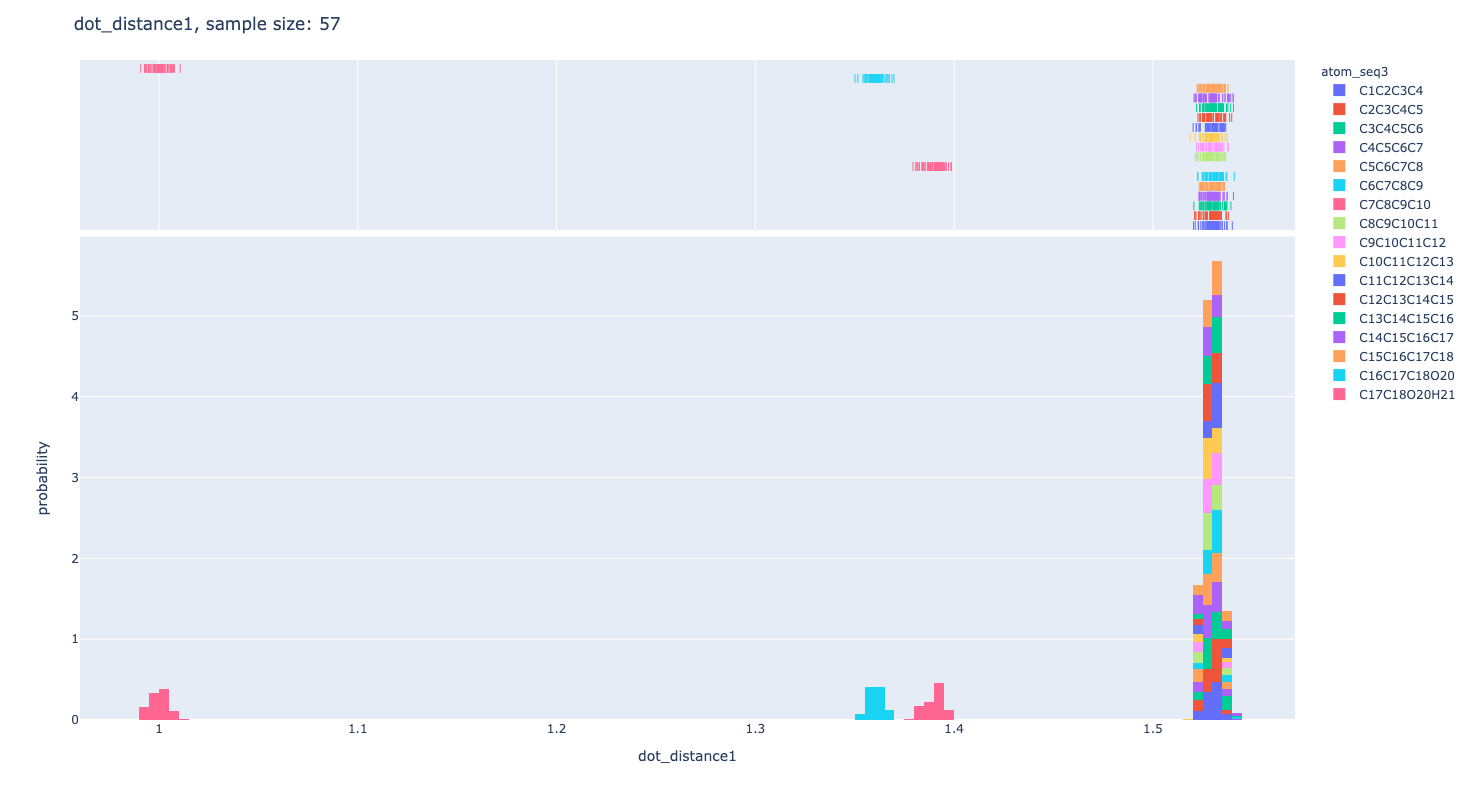

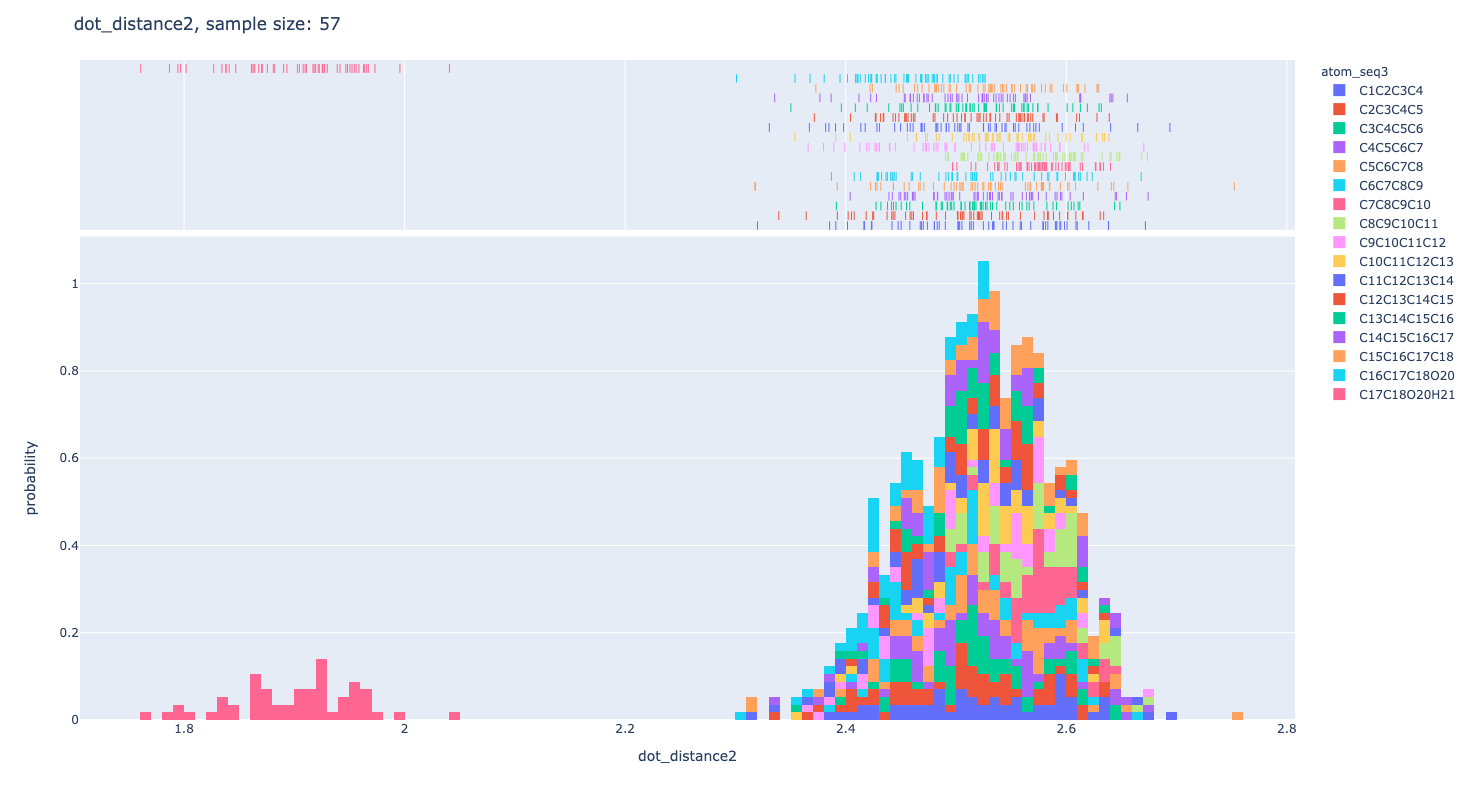

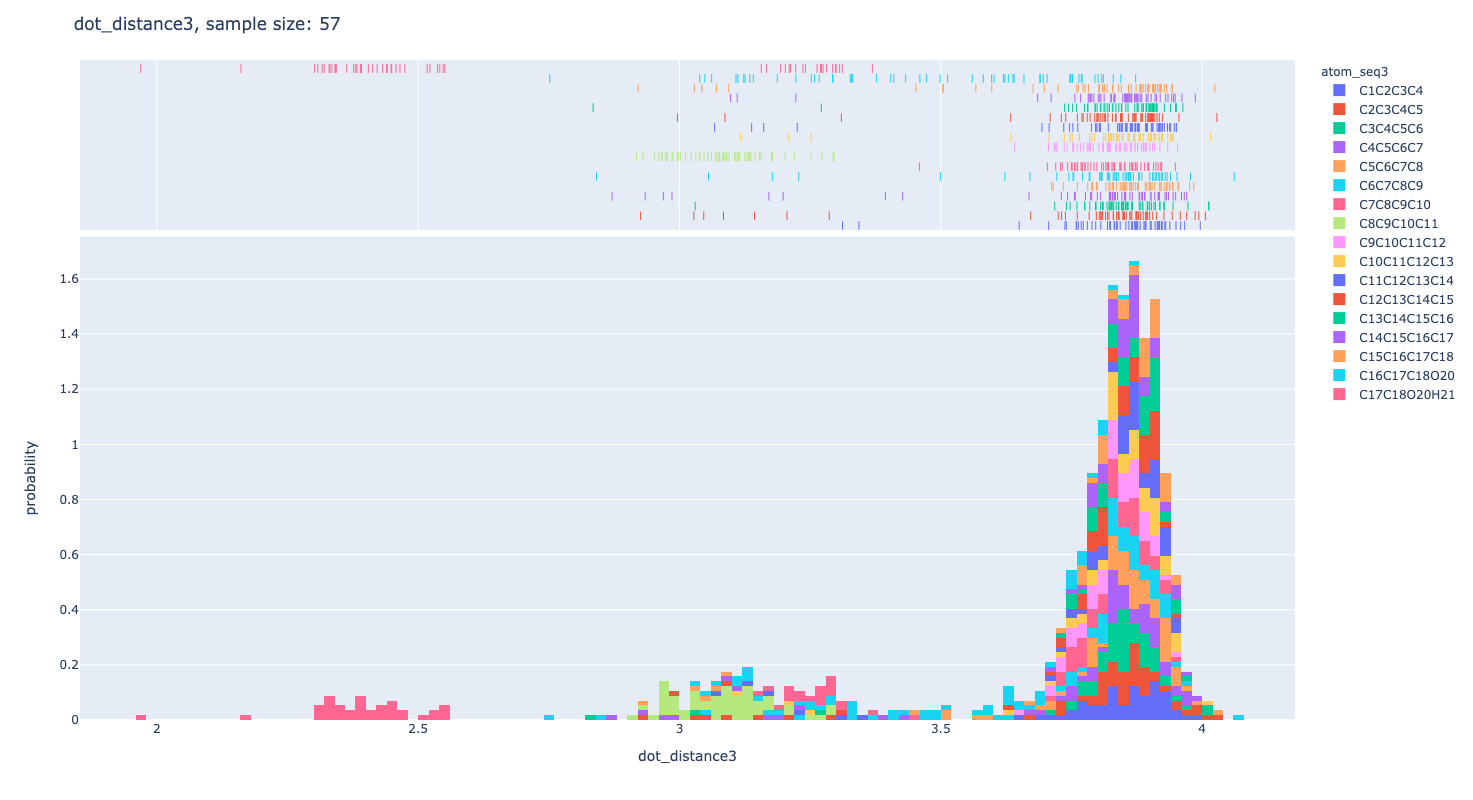

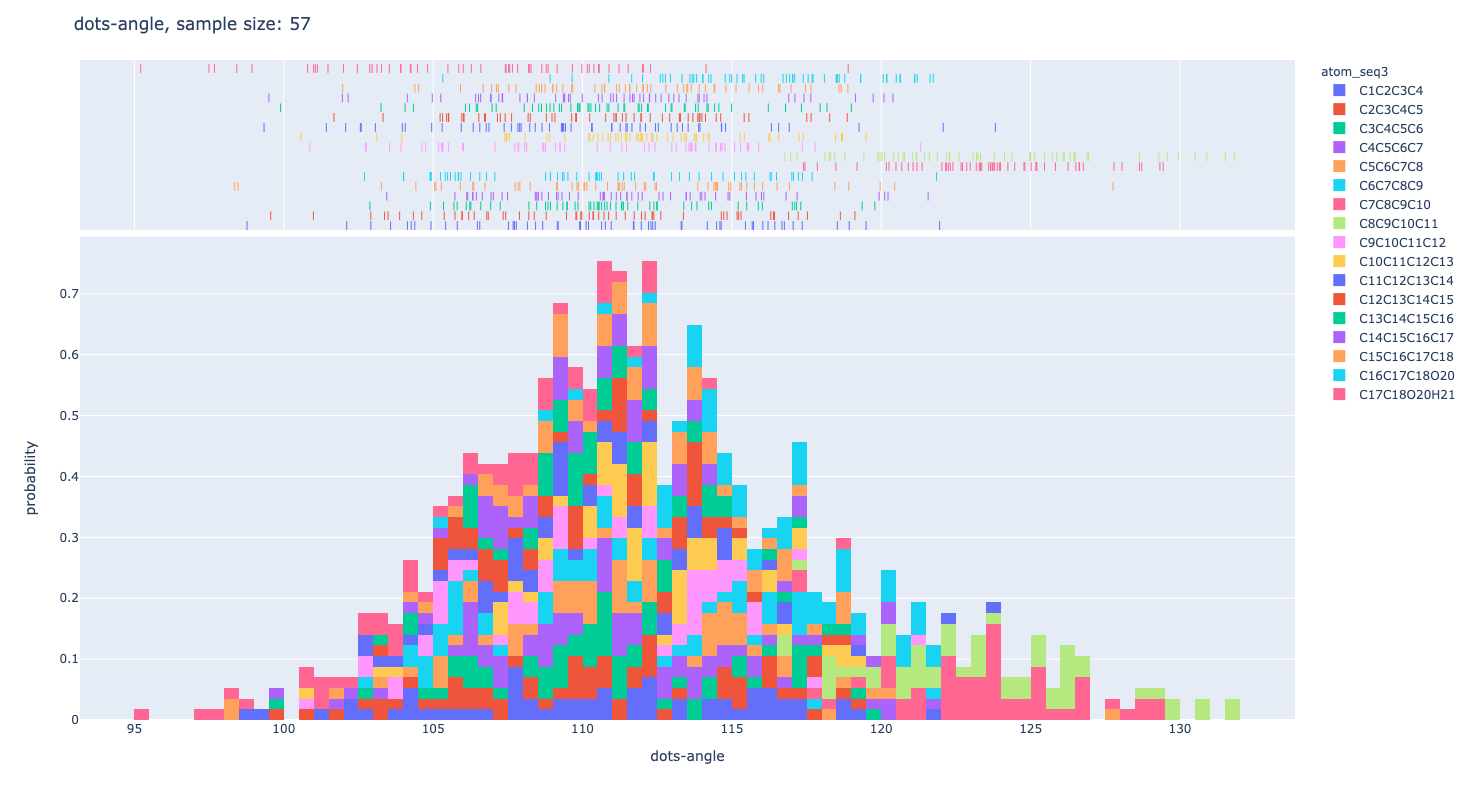

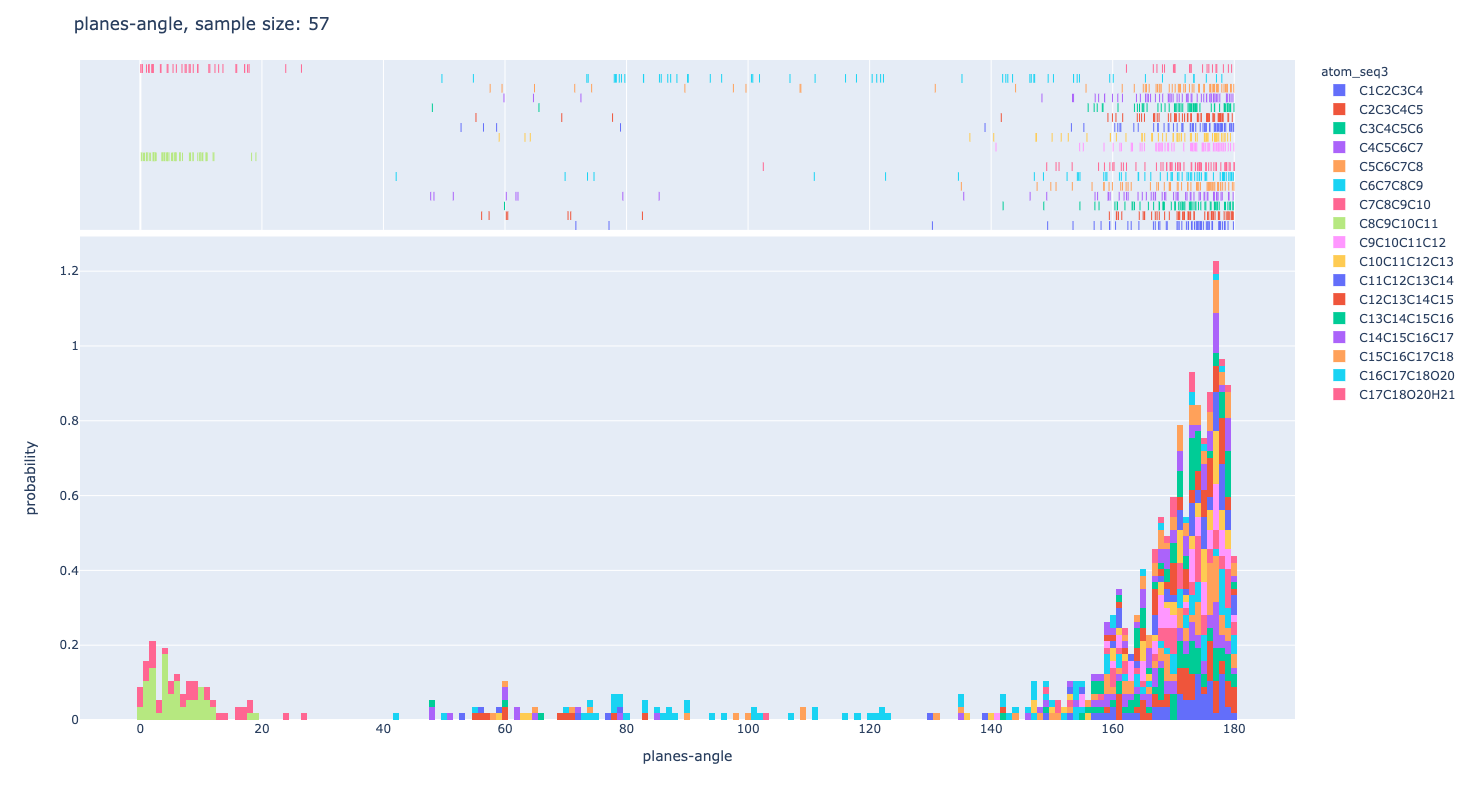

In [282]:
#protein_hist(df.dropna(),xlabel="dots-distance")
protein_hist(df.dropna(),xlabel="dot_distance1")
protein_hist(df.dropna(),xlabel="dot_distance2")
protein_hist(df.dropna(),xlabel="dot_distance3")
protein_hist(df.dropna(),xlabel="dots-angle")
protein_hist(df.dropna(),xlabel="planes-angle")

### Simulation

In [408]:
seq = 'atom_seq2'
#seq = 'Cx'
Cx = np.unique([c for c in df[seq] if c])
features = ['dots-angle','planes-angle', 'dot_distance1', 'dot_distance2', 'dot_distance3']
features_all = [seq]+ features 

In [409]:
Cx

array(['CCCC', 'CCCO', 'CCCc9', 'CCOH', 'CCc9c10', 'Cc9c10C', 'c10CCC',
       'c9c10CC'], dtype='<U7')

In [410]:
features

['dots-angle',
 'planes-angle',
 'dot_distance1',
 'dot_distance2',
 'dot_distance3']

In [411]:
features_all

['atom_seq2',
 'dots-angle',
 'planes-angle',
 'dot_distance1',
 'dot_distance2',
 'dot_distance3']

In [412]:
protein_distr = [ df[df[seq]==c][features_all] for c in Cx ]
atom2distr = dict(zip(Cx, protein_distr))

In [413]:
def protine_sim(Cx, n_sim=1):
    sim_df = pd.concat([pd.concat([atom2distr[c][features_all].sample(n=1, random_state=x) for c in Cx]) for x in range(n_sim)])
    return(sim_df)

In [414]:
#protine_sim_df = protine_sim(Cx, n_sim=300)

#C_tmp = ["C"+str(x) for x in range(1,19)]
C_tmp = Cx
C_tmp

array(['CCCC', 'CCCO', 'CCCc9', 'CCOH', 'CCc9c10', 'Cc9c10C', 'c10CCC',
       'c9c10CC'], dtype='<U7')

In [415]:
protine_sim_df = protine_sim(C_tmp, n_sim=500)

display(protine_sim_df)
protine_sim_df.to_csv("output/simulated_data.csv")

atom_seq2  dots-angle  planes-angle  dot_distance1  dot_distance2  \
393      CCCC  113.995910    166.916352       1.530392       2.564956   
717      CCCO  116.932372    111.027738       1.360919       2.463615   
707     CCCc9  106.560243    169.592077       1.533786       2.460671   
718      CCOH  107.560889    167.276902       1.000450       1.916925   
708   CCc9c10  128.057142    178.622563       1.391330       2.630456   
..        ...         ...           ...            ...            ...   
698      CCOH  103.905594    177.127736       0.990808       1.861478   
688   CCc9c10  117.396130    160.213530       1.386723       2.496998   
689   Cc9c10C  124.376911      4.457060       1.531307       2.581840   
691    c10CCC  103.109651    171.038082       1.527285       2.390837   
690   c9c10CC  114.458679    175.721920       1.525352       2.570175   

     dot_distance3  
393       3.872131  
717       3.513090  
707       3.785472  
718       3.293038  
708       3.820694  
..             ...  
698       3.210078  
688       3.768355  
689       2.960726  
691       3.811902  
690       3.883967  

[4000 rows x 6 columns]

In [416]:
def protein_sim_plot(df,xlabel="dots-angle",):
    n_sim = sum(protine_sim_df[seq] == Cx[0])
    fig = px.histogram(df, x=xlabel, color=seq, nbins=100,marginal="rug")
    fig.update_layout(title="Simulated {0}, n_sim: {1}".format(xlabel, n_sim))
    fig.update_layout(width=1200, height=800)
    fig.show()
    pio.write_html(fig, "output/{}_sim.html".format(xlabel))
    pio.write_image(fig, "output/{}_sim.png".format(xlabel))

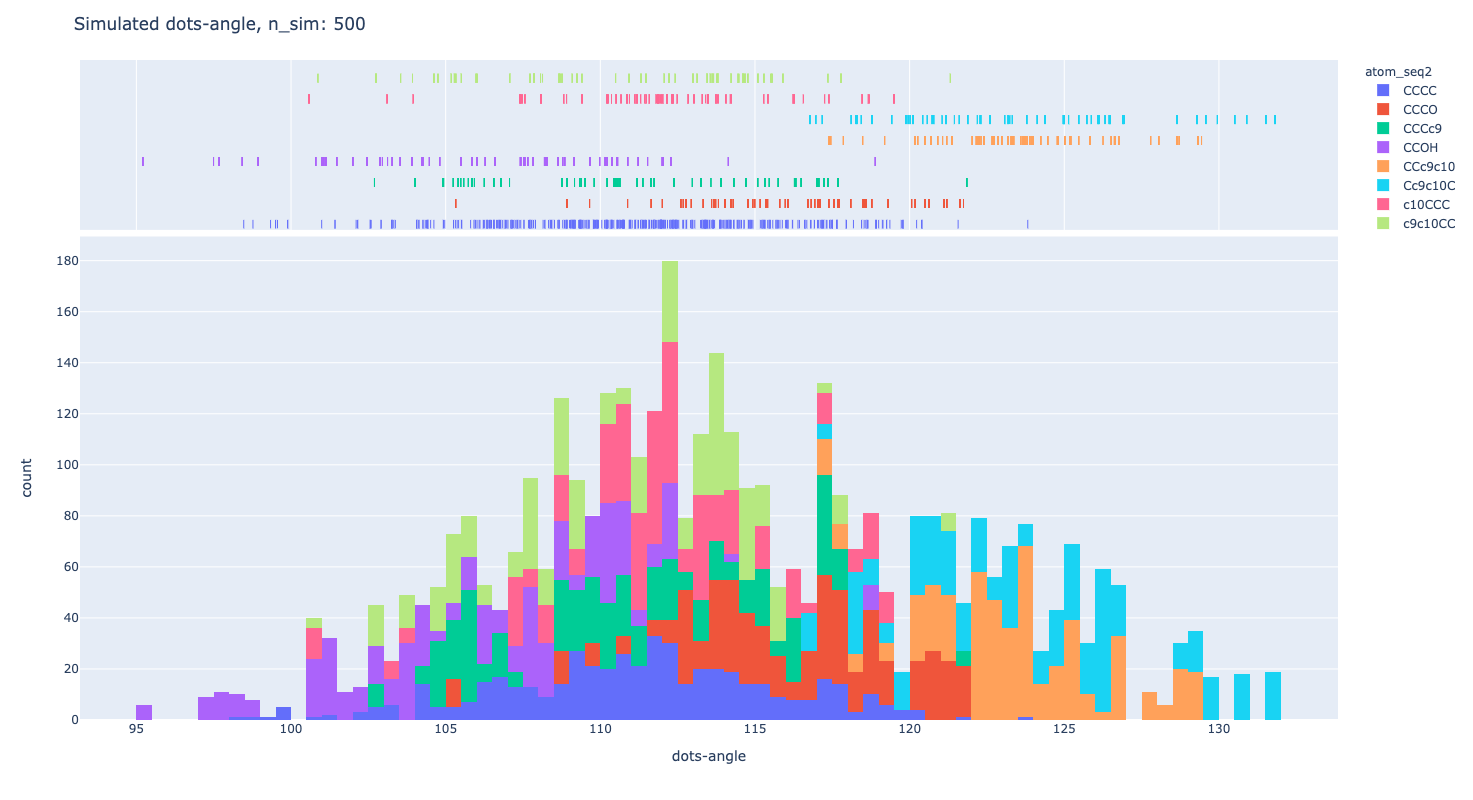

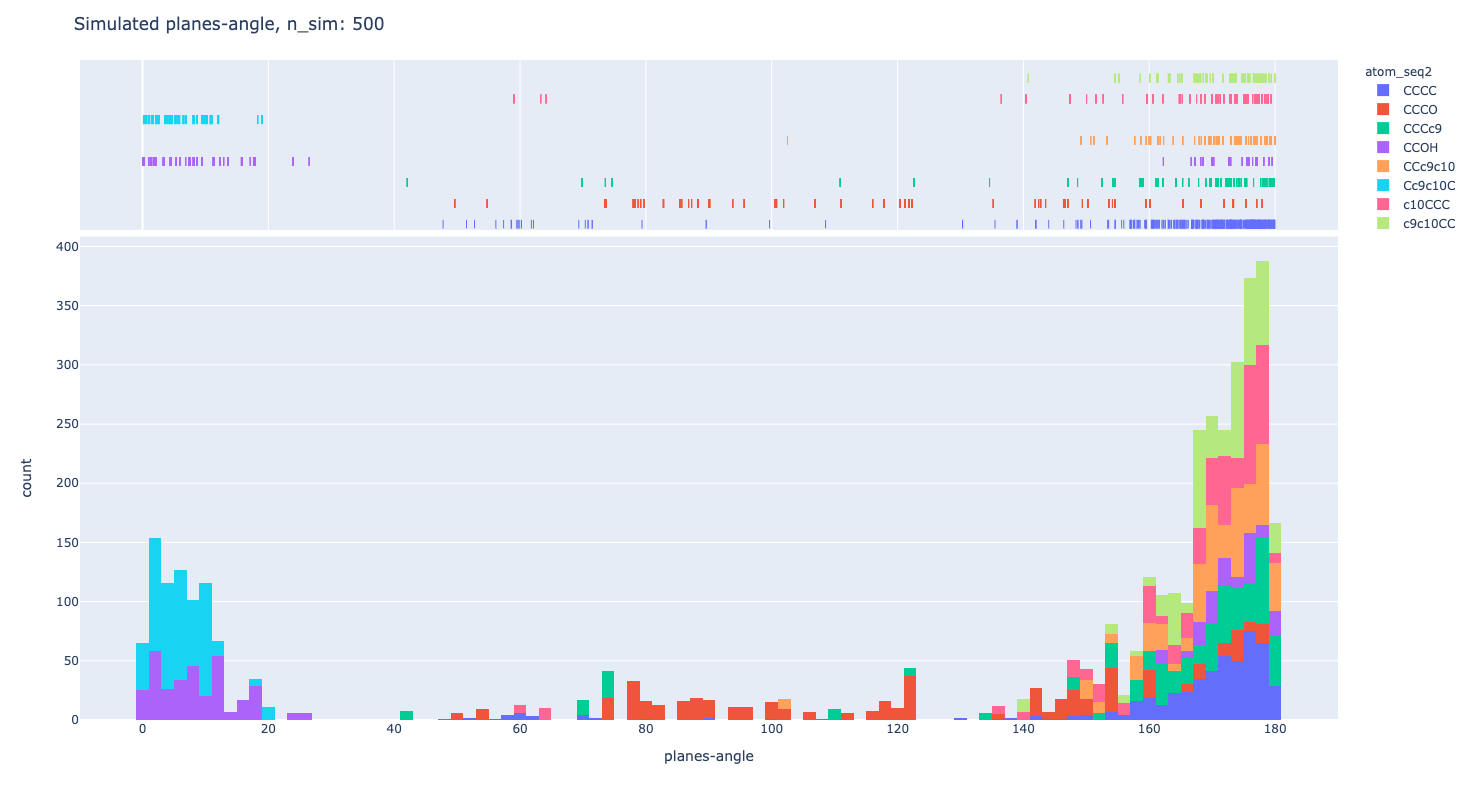

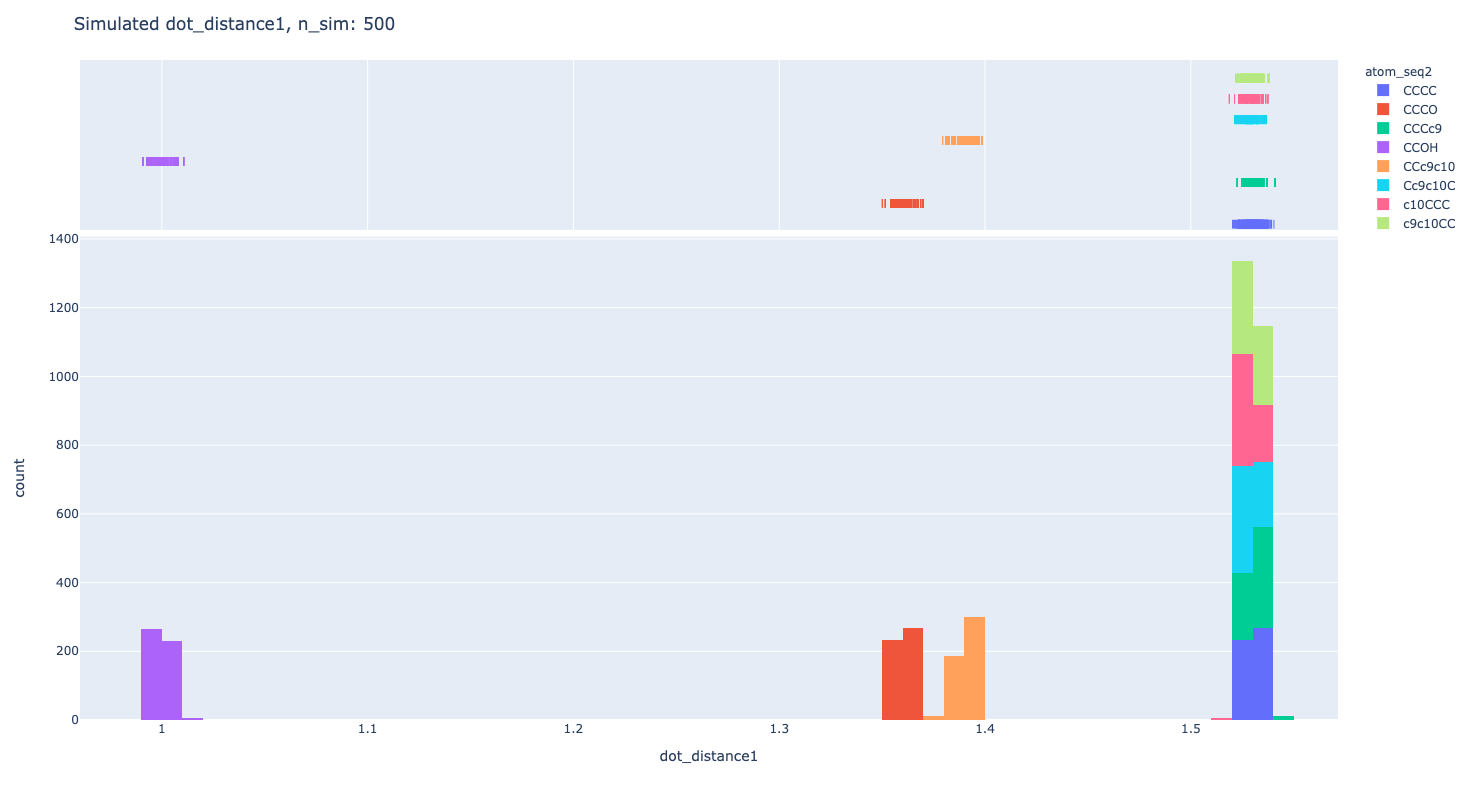

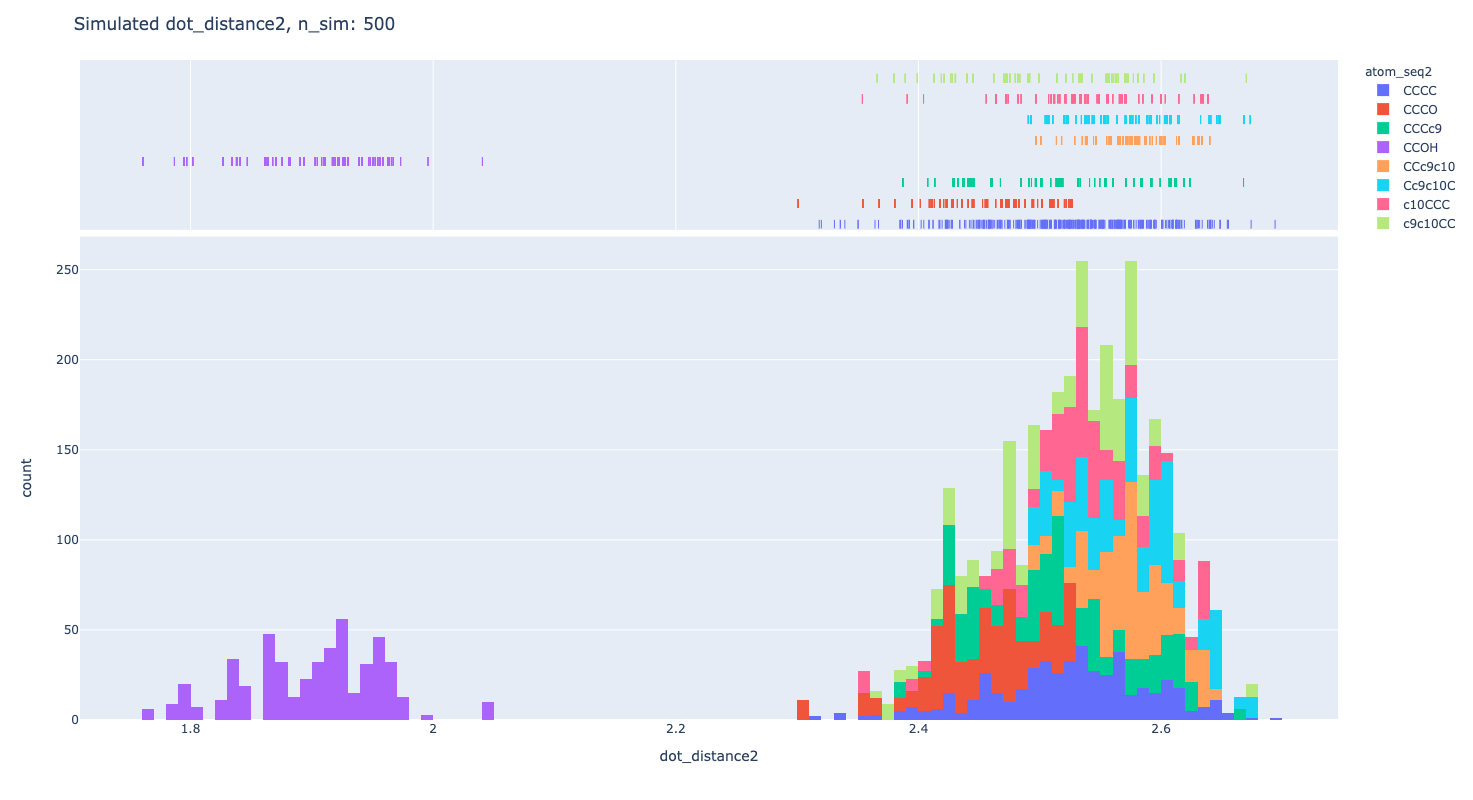

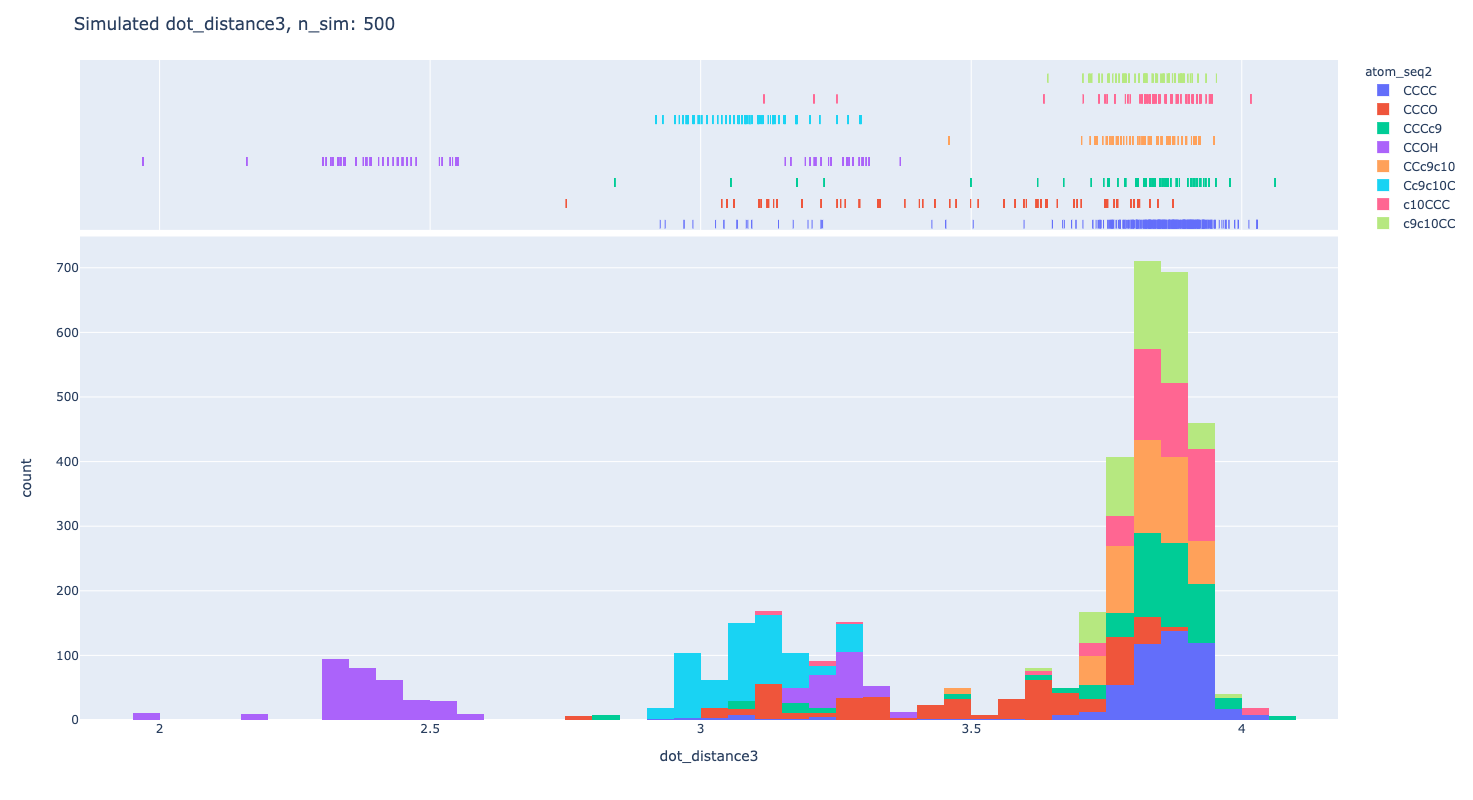

In [417]:
# protein_sim_plot(protine_sim_df,xlabel="dots-angle")
# protein_sim_plot(protine_sim_df,xlabel="planes-angle")
# protein_sim_plot(protine_sim_df,xlabel="dot_distance1")
for f in features:
    protein_sim_plot(protine_sim_df,xlabel=f)

In [194]:
import os
os.system("gsutil -m cp output/*.html gs://protein-dynamics-ai/")
os.system("gsutil -m cp output/*.png gs://protein-dynamics-ai/")
os.system("gsutil -m cp output/*.csv gs://protein-dynamics-ai/")

30720

dot_length  = (C, D)

dot_angle   = (B, C, D)

plane_angle = (A, B, C, D)
